# Importation des bibliothèques

In [1]:
import sys
sys.path.insert(0, '..')


In [2]:
%load_ext autoreload
%autoreload 2
from modele import Module_lineare , Softmax ,TanH , Sigmoide
from sequentiel import Sequentiel , Optim
from loss  import MSELoss , CELoss , BCELoss
import utils as ut
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from keras.datasets import mnist

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

2024-05-24 15:50:08.976546: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-24 15:50:09.705536: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-24 15:50:09.708673: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-24 15:50:12.759787: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Chargement des données USPS

In [3]:
(all_X_train, all_y_train), (all_X_test, all_y_test) = mnist.load_data()
N_train , d1, d2 = all_X_train.shape
N_test = all_X_test.shape[0]

all_X_train  = all_X_train.reshape(N_train , d1*d2).astype('float32') 
all_X_test = all_X_test.reshape(N_test, d1*d2).astype('float32') 

#Normalisation des données 
all_X_train /= 255
all_X_train /= 255

print(all_X_train.shape , all_X_test.shape)

(60000, 784) (10000, 784)


In [4]:
nb_train = 5000
nb_test = 100

X_train = all_X_train[:nb_train]
y_train = all_y_train[:nb_train]
X_test = all_X_test[:nb_test]
y_test = all_y_test[:nb_test]

y_train , y_test = y_train.reshape(-1,1) , y_test.reshape(-1,1)

# Expérimentations

## Apprentissage avec des donnéess non-bruitées

### Création du modéle auto_encodeur 1

## Éxperimentation sur la reconstruction des images : 

In [ ]:
uspsdatatrain = "./data/USPS_train.txt"
uspsdatatest = "./data/USPS_test.txt"
alltrainx,alltrainy = ut.load_usps(uspsdatatrain)
alltestx,alltesty = ut.load_usps(uspsdatatest)

alltrainy , alltesty = alltrainy.reshape(-1,1) , alltesty.reshape(-1,1)

print('Train_X :', alltrainx.shape)
print('Train_y :', alltrainy.shape)
print()
print('Test_X :', alltestx.shape)
print('Test_y :', alltesty.shape)

In [ ]:
input_size = alltrainx.shape[1]
hidden_1 = input_size//2
output_size = hidden_1//2



module_1 = Module_lineare(input_size, hidden_1 , True)
module_2 = Module_lineare(hidden_1, output_size,True)

module_3 = Module_lineare(output_size, hidden_1,True)
module_3._parameters['weights'] = module_2._parameters['weights'].T
module_4 = Module_lineare(hidden_1, input_size,True)
module_4._parameters['weights'] = module_1._parameters['weights'].T

tan_1 = TanH()
tan_2 = TanH()

tan_3 = TanH()
sigmoide = Sigmoide()

loss = BCELoss()


Encodeur = [module_1,tan_1,module_2,tan_2]
Decodeur = [module_3,tan_3,module_4,sigmoide]

auto_encodeur = Encodeur + Decodeur
network = Sequentiel(auto_encodeur)


optimiser = Optim(network,loss,eps=1e-3)

print(optimiser._net)

In [ ]:
batch_size = 10
epochs = 100

losses = optimiser.SGD(alltrainx, alltrainx, batch_size, epochs)

epoch  0
epoch  1
epoch  2
epoch  3
epoch  4
epoch  5
epoch  6
epoch  7
epoch  8
epoch  9
epoch  10
epoch  11
epoch  12
epoch  13
epoch  14
epoch  15
epoch  16
epoch  17
epoch  18
epoch  19
epoch  20
epoch  21
epoch  22
epoch  23
epoch  24
epoch  25
epoch  26
epoch  27
epoch  28
epoch  29
epoch  30
epoch  31
epoch  32
epoch  33
epoch  34
epoch  35
epoch  36
epoch  37
epoch  38
epoch  39
epoch  40
epoch  41
epoch  42
epoch  43
epoch  44
epoch  45
epoch  46
epoch  47
epoch  48
epoch  49
epoch  50
epoch  51
epoch  52
epoch  53
epoch  54
epoch  55
epoch  56
epoch  57
epoch  58
epoch  59
epoch  60
epoch  61
epoch  62
epoch  63
epoch  64
epoch  65
epoch  66
epoch  67
epoch  68
epoch  69
epoch  70
epoch  71
epoch  72
epoch  73
epoch  74
epoch  75
epoch  76
epoch  77
epoch  78
epoch  79
epoch  80
epoch  81
epoch  82
epoch  83
epoch  84
epoch  85
epoch  86
epoch  87
epoch  88
epoch  89
epoch  90
epoch  91
epoch  92
epoch  93
epoch  94
epoch  95
epoch  96
epoch  97
epoch  98
epoch  99


#### Visualisation de le prediction des données Test 

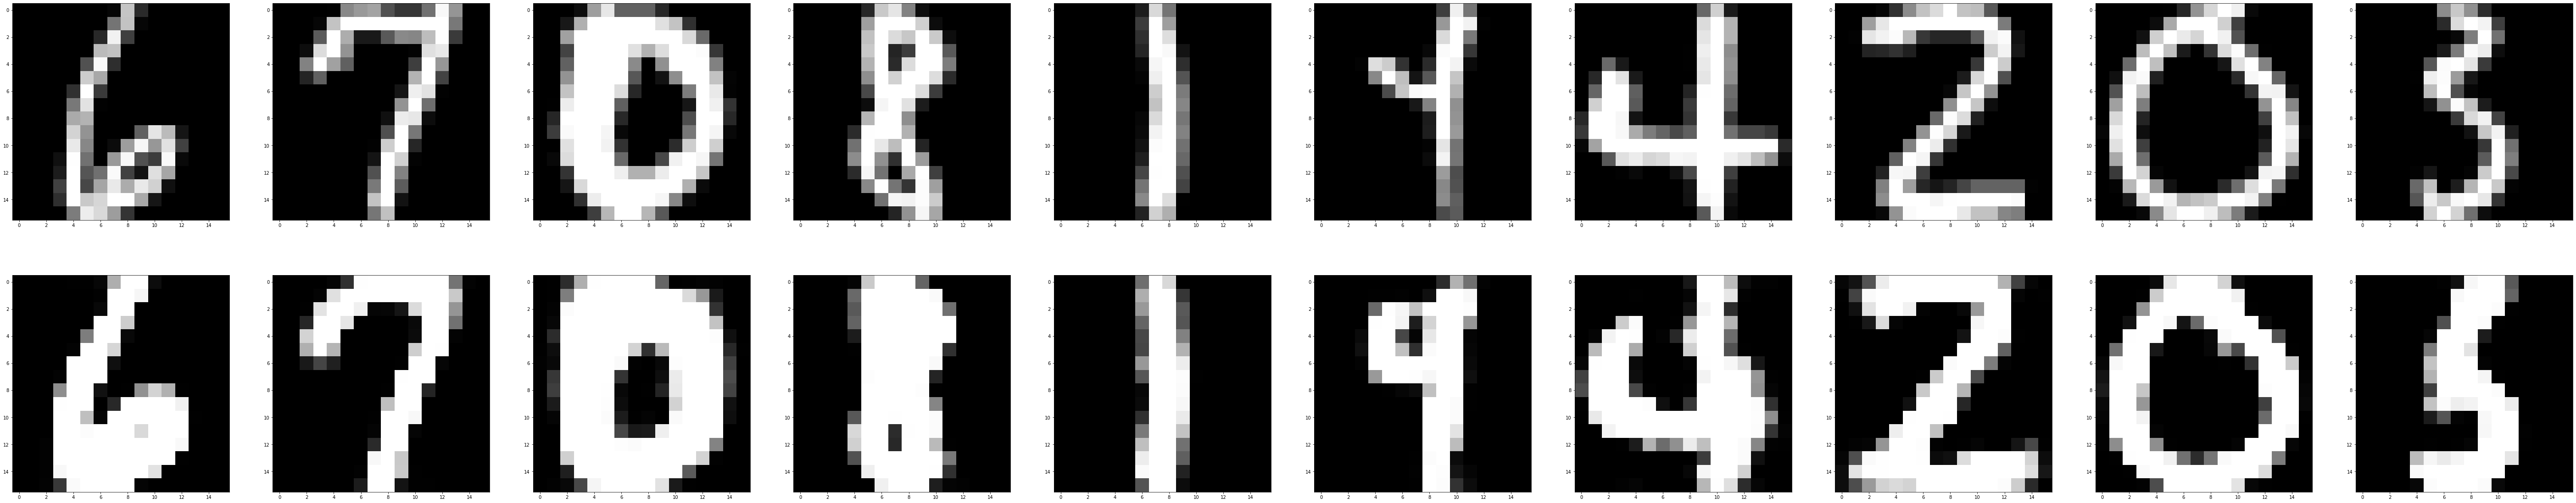

In [ ]:
nb_examples = 10
index = np.random.choice(np.arange(alltestx.shape[0]), nb_examples, replace=False)
plt.figure(figsize=(10*nb_examples,20))
j = 1
for i in index:
    plt.subplot(2,10,j)
    ut.show_usps(alltestx[i])

    plt.subplot(2,10,j+10)
    ut.show_usps(optimiser._net.forward(np.asarray([alltestx[i]])))
    
    j+=1

### Variation de la taille des sorties : 

In [ ]:
input_size = alltrainx.shape[1]
hidden_1 = 100
output_size = 10



module_1 = Module_lineare(input_size, hidden_1 , True)
module_2 = Module_lineare(hidden_1, output_size,True)

module_3 = Module_lineare(output_size, hidden_1,True)
module_3._parameters['weights'] = module_2._parameters['weights'].T
module_4 = Module_lineare(hidden_1, input_size,True)
module_4._parameters['weights'] = module_1._parameters['weights'].T

tan_1 = TanH()
tan_2 = TanH()

tan_3 = TanH()
sigmoide = Sigmoide()

loss = BCELoss()


Encodeur = [module_1,tan_1,module_2,tan_2]
Decodeur = [module_3,tan_3,module_4,sigmoide]

auto_encodeur = Encodeur + Decodeur
network_2 = Sequentiel(auto_encodeur)


optimiser = Optim(network_2,loss,eps=1e-3)

print(optimiser._net)

In [ ]:
batch_size = 10
epochs = 100

optimiser.SGD(alltrainx, alltrainx, batch_size, epochs)

epoch  0
epoch  1
epoch  2
epoch  3
epoch  4
epoch  5
epoch  6
epoch  7
epoch  8
epoch  9
epoch  10
epoch  11
epoch  12
epoch  13
epoch  14
epoch  15
epoch  16
epoch  17
epoch  18
epoch  19
epoch  20
epoch  21
epoch  22
epoch  23
epoch  24
epoch  25
epoch  26
epoch  27
epoch  28
epoch  29
epoch  30
epoch  31
epoch  32
epoch  33
epoch  34
epoch  35
epoch  36
epoch  37
epoch  38
epoch  39
epoch  40
epoch  41
epoch  42
epoch  43
epoch  44
epoch  45
epoch  46
epoch  47
epoch  48
epoch  49
epoch  50
epoch  51
epoch  52
epoch  53
epoch  54
epoch  55
epoch  56
epoch  57
epoch  58
epoch  59
epoch  60
epoch  61
epoch  62
epoch  63
epoch  64
epoch  65
epoch  66
epoch  67
epoch  68
epoch  69
epoch  70
epoch  71
epoch  72
epoch  73
epoch  74
epoch  75
epoch  76
epoch  77
epoch  78
epoch  79
epoch  80
epoch  81
epoch  82
epoch  83
epoch  84
epoch  85
epoch  86
epoch  87
epoch  88
epoch  89
epoch  90
epoch  91
epoch  92
epoch  93
epoch  94
epoch  95
epoch  96
epoch  97
epoch  98
epoch  99


[-103.92900122586435,
 -204.30363038502543,
 -230.27164499104714,
 -238.9017537553711,
 -231.50040235437464,
 -187.73299813797726,
 -130.785788952072,
 -107.44826202848682,
 -81.62297964777395,
 -91.78986957421534,
 -88.87856849113123,
 -72.81766823615142,
 -37.260320239194925,
 -32.1230207419512,
 37.755596538424804,
 11.193338283798818,
 33.97968003537275,
 63.02842619906055,
 61.96142230054473,
 61.33274365525429,
 60.85307146804456,
 60.46554712006104,
 60.141141372137064,
 59.862810614778965,
 59.619624064752465,
 59.40412440615318,
 59.21098436857769,
 59.03625947759092,
 58.87694355572125,
 58.730689942595596,
 58.595628965196816,
 58.470244033799894,
 58.35328481815923,
 58.243704656038844,
 58.1406141386698,
 58.04324558296142,
 57.95092481840036,
 57.863047559953586,
 57.779058096902205,
 57.69842794626489,
 57.620631303919154,
 57.54511219769833,
 57.471233361366295,
 57.39818438743893,
 57.324791086999255,
 57.24904522780213,
 57.1666128535905,
 57.06311807415031,
 56.67193

#### Visualisation de le prediction des données Test 

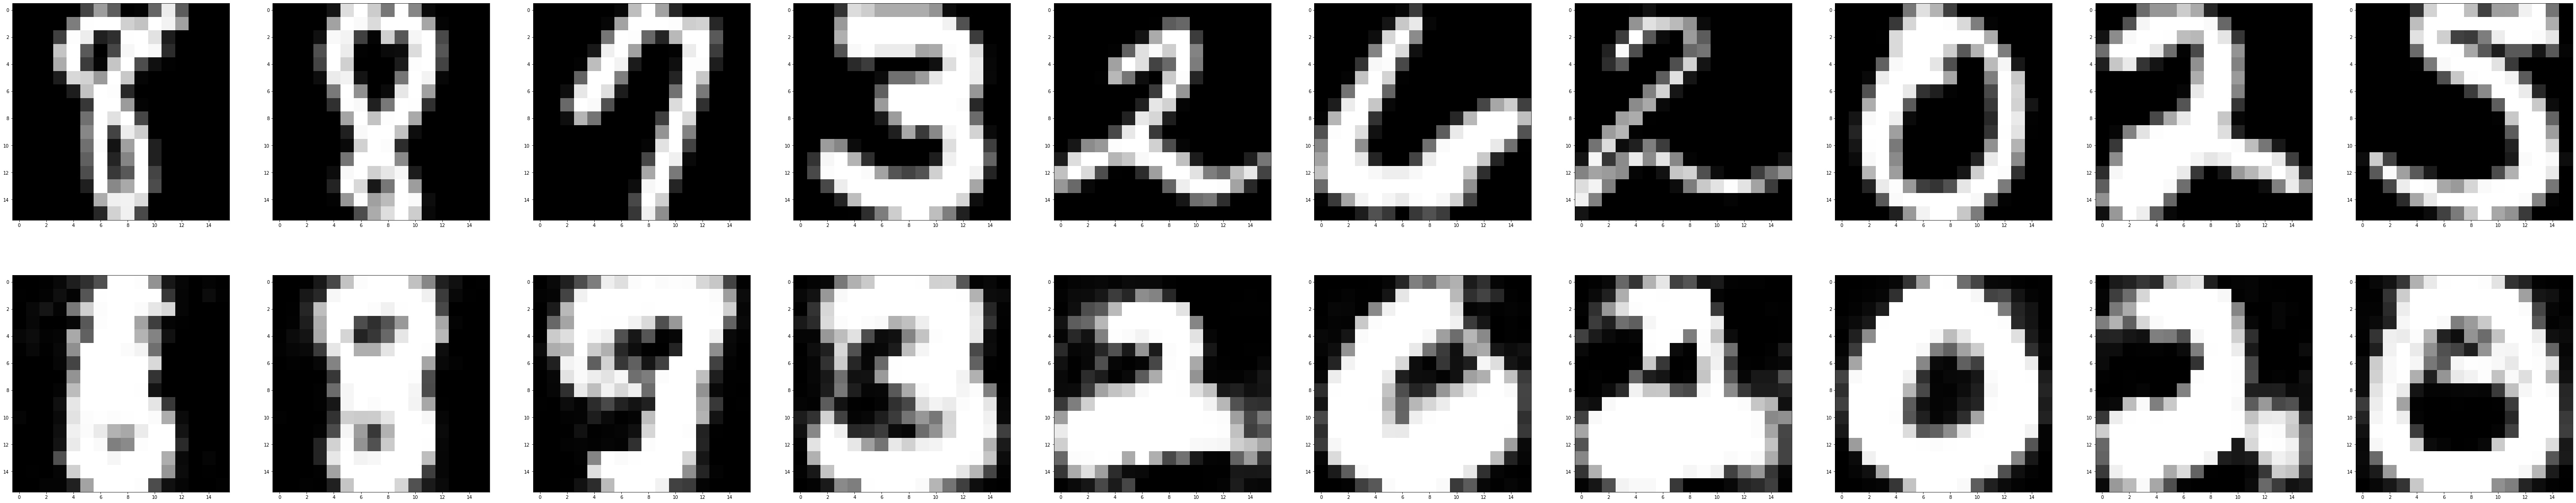

In [ ]:
nb_examples = 10
index = np.random.choice(np.arange(alltestx.shape[0]), nb_examples, replace=False)
plt.figure(figsize=(10*nb_examples,20))
j = 1
for i in index:
    plt.subplot(2,10,j)
    ut.show_usps(alltestx[i])

    plt.subplot(2,10,j+10)
    ut.show_usps(optimiser._net.forward(np.asarray([alltestx[i]])))
    
    j+=1

### Variation du nombre de couches: 

In [ ]:
input_size = alltrainx.shape[1]
hidden_1 = input_size//2
hidden_2 = hidden_1//2
output_size = hidden_2//2

module_1 = Module_lineare(input_size, hidden_1 , True)
module_2 = Module_lineare(hidden_1, hidden_2,True)
module_3 = Module_lineare(hidden_2, output_size,True)


module_4 = Module_lineare(output_size, hidden_2,True)
module_4._parameters['weights'] = module_3._parameters['weights'].T
module_5 = Module_lineare(hidden_2, hidden_1,True)
module_5._parameters['weights'] = module_2._parameters['weights'].T

module_6 = Module_lineare(hidden_1, input_size,True)
module_6._parameters['weights'] = module_1._parameters['weights'].T



tan_1 = TanH()
tan_2 = TanH()
tan_3 = TanH()

tan_4 = TanH()
tan_5 = TanH()
sigmoide = Sigmoide()

loss = BCELoss()


Encodeur = [module_1,tan_1,module_2,tan_2,module_3,tan_3]
Decodeur = [module_4,tan_4,module_5,tan_5,module_6,sigmoide]

auto_encodeur = Encodeur + Decodeur
network = Sequentiel(auto_encodeur)


optimiser = Optim(network,loss,eps=1e-3)

print(optimiser._net)

In [ ]:
batch_size = 10
epochs = 100

optimiser.SGD(alltrainx, alltrainx, batch_size, epochs)

epoch  0
epoch  1
epoch  2
epoch  3
epoch  4
epoch  5
epoch  6
epoch  7
epoch  8
epoch  9
epoch  10
epoch  11
epoch  12
epoch  13
epoch  14
epoch  15
epoch  16
epoch  17
epoch  18
epoch  19
epoch  20
epoch  21
epoch  22
epoch  23
epoch  24
epoch  25
epoch  26
epoch  27
epoch  28
epoch  29
epoch  30
epoch  31
epoch  32
epoch  33
epoch  34
epoch  35
epoch  36
epoch  37
epoch  38
epoch  39
epoch  40
epoch  41
epoch  42
epoch  43
epoch  44
epoch  45
epoch  46
epoch  47
epoch  48
epoch  49
epoch  50
epoch  51
epoch  52
epoch  53
epoch  54
epoch  55
epoch  56
epoch  57
epoch  58
epoch  59
epoch  60
epoch  61
epoch  62
epoch  63
epoch  64
epoch  65
epoch  66
epoch  67
epoch  68
epoch  69
epoch  70
epoch  71
epoch  72
epoch  73
epoch  74
epoch  75
epoch  76
epoch  77
epoch  78
epoch  79
epoch  80
epoch  81
epoch  82
epoch  83
epoch  84
epoch  85
epoch  86
epoch  87
epoch  88
epoch  89
epoch  90
epoch  91
epoch  92
epoch  93
epoch  94
epoch  95
epoch  96
epoch  97
epoch  98
epoch  99


[-178.0226864727672,
 -282.8437827532,
 -238.07270550517364,
 -56.42068800397323,
 -33.436892508359236,
 35.72473519478352,
 55.23748767724188,
 56.41654707841238,
 56.138791370948844,
 55.95036060569167,
 55.80581853532851,
 55.68813270574102,
 55.58877941433122,
 55.50281555209766,
 55.427095439632254,
 55.3594833866473,
 55.29845820060813,
 55.242895478071404,
 55.19193922736688,
 55.14492192669815,
 55.10131252491548,
 55.060681392186204,
 55.0226759036296,
 54.98700300115145,
 54.953416439416785,
 54.92170723974288,
 54.89169642489794,
 54.86322944261882,
 54.83617180143153,
 54.810405663641454,
 54.78582712692635,
 54.76234410315119,
 54.739874542526806,
 54.718345040530274,
 54.69768966398793,
 54.6778489666664,
 54.6587691723243,
 54.64040149204148,
 54.6227015218799,
 54.6056287526331,
 54.58914611929962,
 54.57321964369842,
 54.557818100780025,
 54.54291273096506,
 54.52847699967615,
 54.51448637335015,
 54.50091813009508,
 54.48775118114331,
 54.474965926320934,
 54.46254411

#### Visualisation de la prediction des données Test 

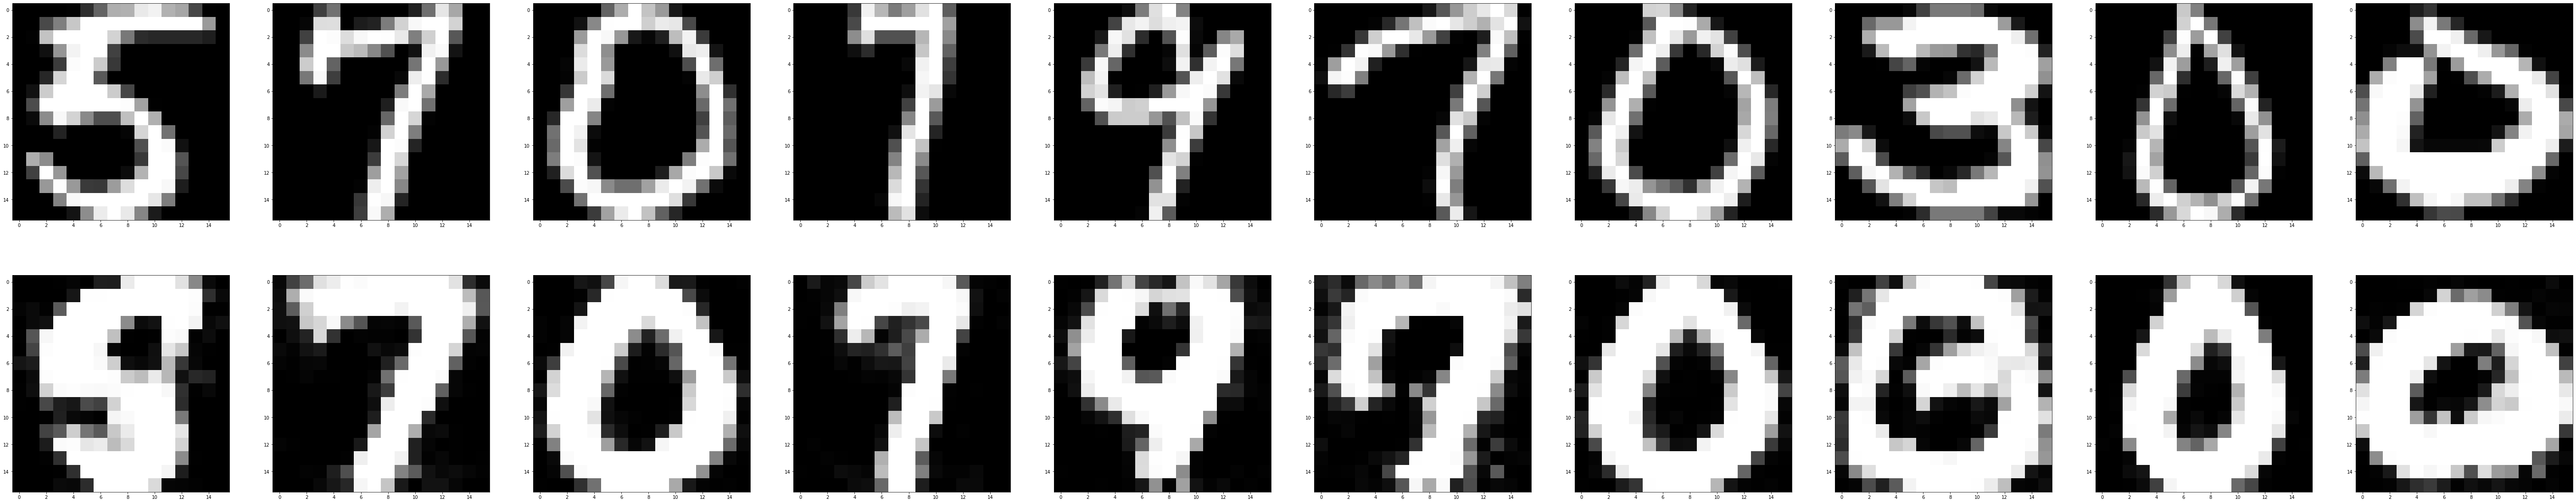

In [ ]:
nb_examples = 10
index = np.random.choice(np.arange(alltestx.shape[0]), nb_examples, replace=False)
plt.figure(figsize=(10*nb_examples,20))
j = 1
for i in index:
    plt.subplot(2,10,j)
    ut.show_usps(alltestx[i])

    plt.subplot(2,10,j+10)
    ut.show_usps(optimiser._net.forward(np.asarray([alltestx[i]])))
    
    j+=1

### Variation de la taille du batch : 

In [ ]:
input_size = alltrainx.shape[1]
hidden_1 = input_size//2
output_size = hidden_1//2



module_1 = Module_lineare(input_size, hidden_1 , True)
module_2 = Module_lineare(hidden_1, output_size,True)

module_3 = Module_lineare(output_size, hidden_1,True)
module_3._parameters['weights'] = module_2._parameters['weights'].T
module_4 = Module_lineare(hidden_1, input_size,True)
module_4._parameters['weights'] = module_1._parameters['weights'].T

tan_1 = TanH()
tan_2 = TanH()

tan_3 = TanH()
sigmoide = Sigmoide()

loss = BCELoss()


Encodeur = [module_1,tan_1,module_2,tan_2]
Decodeur = [module_3,tan_3,module_4,sigmoide]

auto_encodeur = Encodeur + Decodeur
network = Sequentiel(auto_encodeur)


optimiser = Optim(network,loss,eps=1e-3)

print(optimiser._net)

In [ ]:
batch_size = 50
epochs = 100

optimiser.SGD(alltrainx, alltrainx, batch_size, epochs)

epoch  0
epoch  1
epoch  2
epoch  3
epoch  4
epoch  5
epoch  6
epoch  7
epoch  8
epoch  9
epoch  10
epoch  11
epoch  12
epoch  13
epoch  14
epoch  15
epoch  16
epoch  17
epoch  18
epoch  19
epoch  20
epoch  21
epoch  22
epoch  23
epoch  24
epoch  25
epoch  26
epoch  27
epoch  28
epoch  29
epoch  30
epoch  31
epoch  32
epoch  33
epoch  34
epoch  35
epoch  36
epoch  37
epoch  38
epoch  39
epoch  40
epoch  41
epoch  42
epoch  43
epoch  44
epoch  45
epoch  46
epoch  47
epoch  48
epoch  49
epoch  50
epoch  51
epoch  52
epoch  53
epoch  54
epoch  55
epoch  56
epoch  57
epoch  58
epoch  59
epoch  60
epoch  61
epoch  62
epoch  63
epoch  64
epoch  65
epoch  66
epoch  67
epoch  68
epoch  69
epoch  70
epoch  71
epoch  72
epoch  73
epoch  74
epoch  75
epoch  76
epoch  77
epoch  78
epoch  79
epoch  80
epoch  81
epoch  82
epoch  83
epoch  84
epoch  85
epoch  86
epoch  87
epoch  88
epoch  89
epoch  90
epoch  91
epoch  92
epoch  93
epoch  94
epoch  95
epoch  96
epoch  97
epoch  98
epoch  99


[-216.8670648941049,
 -358.44961451106803,
 -406.3725089668234,
 -434.0567302292391,
 -454.3423766109901,
 -469.7249553755463,
 -477.57059620481675,
 -490.5067988631827,
 -497.92950986072435,
 -503.09768325466604,
 -509.88364872143035,
 -507.55183046383013,
 -510.3763390759935,
 -507.8529805029379,
 -515.1002533017486,
 -520.1080528371834,
 -518.4594777786572,
 -518.4786642555774,
 -520.9078646970605,
 -514.8414281263823,
 -504.20623989562006,
 -508.92017337457645,
 -507.60364848949126,
 -497.0640874858491,
 -486.3143430797247,
 -470.16366122849377,
 -468.9810120007987,
 -443.34638069646707,
 -436.6815542334273,
 -443.5395361169573,
 -426.36775295212,
 -416.68029888191217,
 -403.1906913089673,
 -381.23198247385375,
 -370.4862641670736,
 -343.4713056937556,
 -329.1413952130507,
 -280.67891347725254,
 -252.60699895677712,
 -270.74195194191543,
 -242.80157192219585,
 -228.27762510305433,
 -230.96444502875138,
 -255.69676746419051,
 -234.84879725513676,
 -231.08927509913536,
 -246.06782543

#### Visualisation de le prediction des données Test 

In [ ]:
alltestx.shape

(2007, 256)

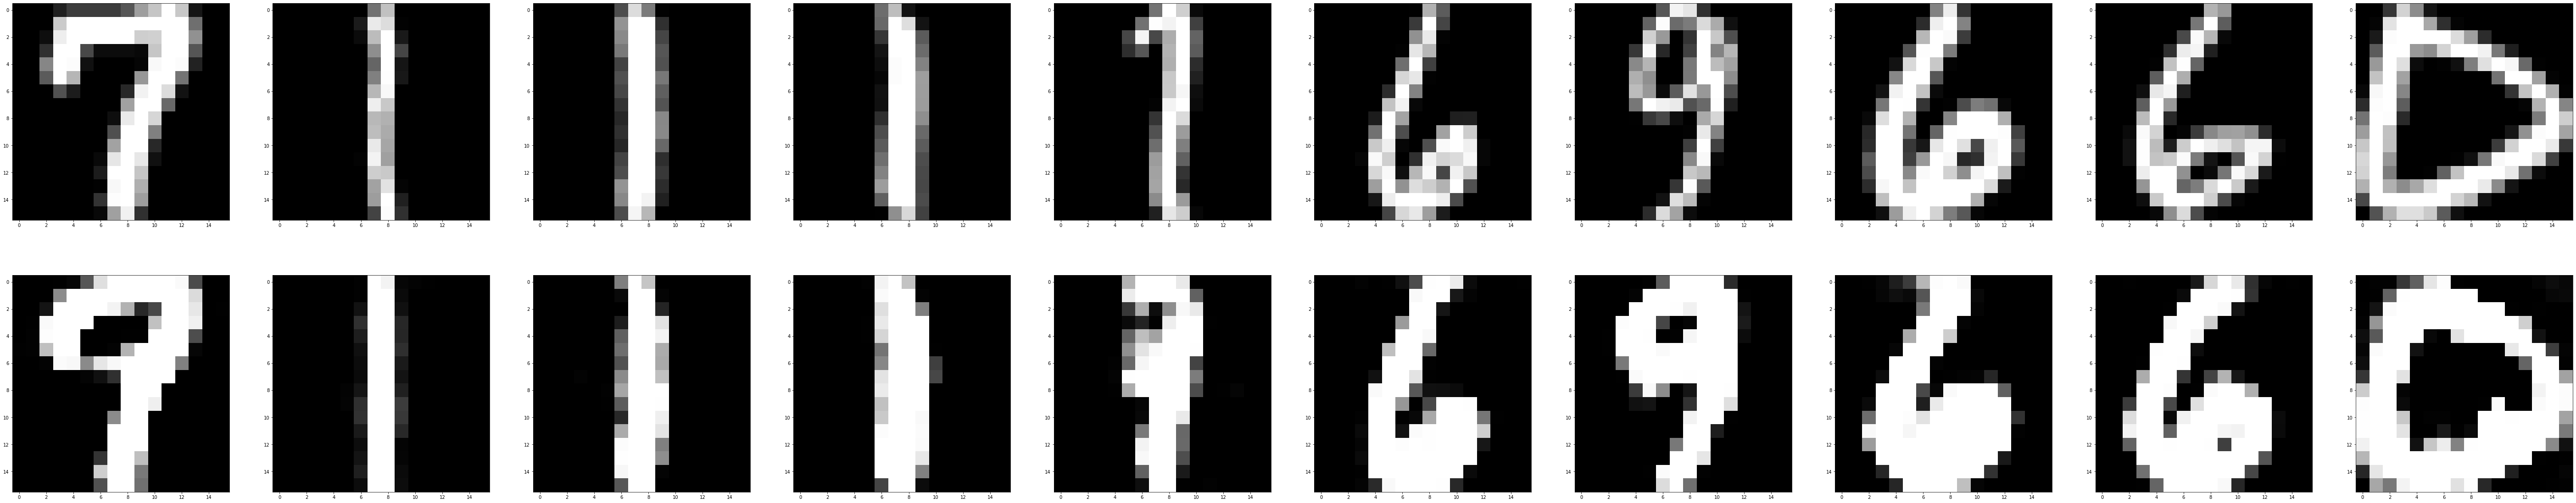

In [ ]:
nb_examples = 10
index = np.random.choice(np.arange(alltestx.shape[0]), nb_examples, replace=False)
plt.figure(figsize=(10*nb_examples,20))
j = 1
for i in index:
    plt.subplot(2,10,j)
    ut.show_usps(alltestx[i])

    plt.subplot(2,10,j+10)
    ut.show_usps(optimiser._net.forward(np.asarray([alltestx[i]])))
    
    j+=1

### Variation du nombre d'epoch : 

In [ ]:
input_size = alltrainx.shape[1]
hidden_1 = input_size//2
output_size = hidden_1//2



module_1 = Module_lineare(input_size, hidden_1 , True)
module_2 = Module_lineare(hidden_1, output_size,True)

module_3 = Module_lineare(output_size, hidden_1,True)
module_3._parameters['weights'] = module_2._parameters['weights'].T
module_4 = Module_lineare(hidden_1, input_size,True)
module_4._parameters['weights'] = module_1._parameters['weights'].T

tan_1 = TanH()
tan_2 = TanH()

tan_3 = TanH()
sigmoide = Sigmoide()

loss = BCELoss()


Encodeur = [module_1,tan_1,module_2,tan_2]
Decodeur = [module_3,tan_3,module_4,sigmoide]

auto_encodeur = Encodeur + Decodeur
network = Sequentiel(auto_encodeur)


optimiser = Optim(network,loss,eps=1e-3)

print(optimiser._net)

In [ ]:
batch_size = 10
epochs = 200

optimiser.SGD(alltrainx, alltrainx, batch_size, epochs)

epoch  0


epoch  1
epoch  2
epoch  3
epoch  4
epoch  5
epoch  6
epoch  7
epoch  8
epoch  9
epoch  10
epoch  11
epoch  12
epoch  13
epoch  14
epoch  15
epoch  16
epoch  17
epoch  18
epoch  19
epoch  20
epoch  21
epoch  22
epoch  23
epoch  24
epoch  25
epoch  26
epoch  27
epoch  28
epoch  29
epoch  30
epoch  31
epoch  32
epoch  33
epoch  34
epoch  35
epoch  36
epoch  37
epoch  38
epoch  39
epoch  40
epoch  41
epoch  42
epoch  43
epoch  44
epoch  45
epoch  46
epoch  47
epoch  48
epoch  49
epoch  50
epoch  51
epoch  52
epoch  53
epoch  54
epoch  55
epoch  56
epoch  57
epoch  58
epoch  59
epoch  60
epoch  61
epoch  62
epoch  63
epoch  64
epoch  65
epoch  66
epoch  67
epoch  68
epoch  69
epoch  70
epoch  71
epoch  72
epoch  73
epoch  74
epoch  75
epoch  76
epoch  77
epoch  78
epoch  79
epoch  80
epoch  81
epoch  82
epoch  83
epoch  84
epoch  85
epoch  86
epoch  87
epoch  88
epoch  89
epoch  90
epoch  91
epoch  92
epoch  93
epoch  94
epoch  95
epoch  96
epoch  97
epoch  98
epoch  99
epoch  100
epoch  1

[-226.5419934323795,
 -361.5679851118689,
 -409.75144285649276,
 -436.9832399346601,
 -458.51741037373654,
 -473.5825740591382,
 -484.6711344224299,
 -494.1272864781711,
 -500.5795342884267,
 -507.5309753752859,
 -512.956308386498,
 -516.0950358846608,
 -518.9887855480076,
 -522.3982087476037,
 -527.1645152199387,
 -529.6464987876172,
 -528.0736212648217,
 -528.5106611584305,
 -531.3769942466868,
 -532.0116289124715,
 -536.1110321132053,
 -533.9051717677761,
 -525.1941970892198,
 -515.6321291212494,
 -509.1343276203191,
 -503.6062854888942,
 -503.91323885321617,
 -506.2265040901941,
 -504.81388565023633,
 -490.08567899863414,
 -470.5531857708112,
 -462.84576524133996,
 -445.5747553843472,
 -430.947652035667,
 -426.6097024385441,
 -401.0149621725855,
 -367.03826215779696,
 -369.57174841103284,
 -372.68888945642266,
 -369.12310755552016,
 -343.30197327815836,
 -353.42031119661954,
 -332.5915646363836,
 -325.0782218313155,
 -323.6733868790123,
 -306.90233684173904,
 -279.02372520495885,
 

#### Visualisation de le prediction des données Test 

In [ ]:
alltestx.shape

(2007, 256)

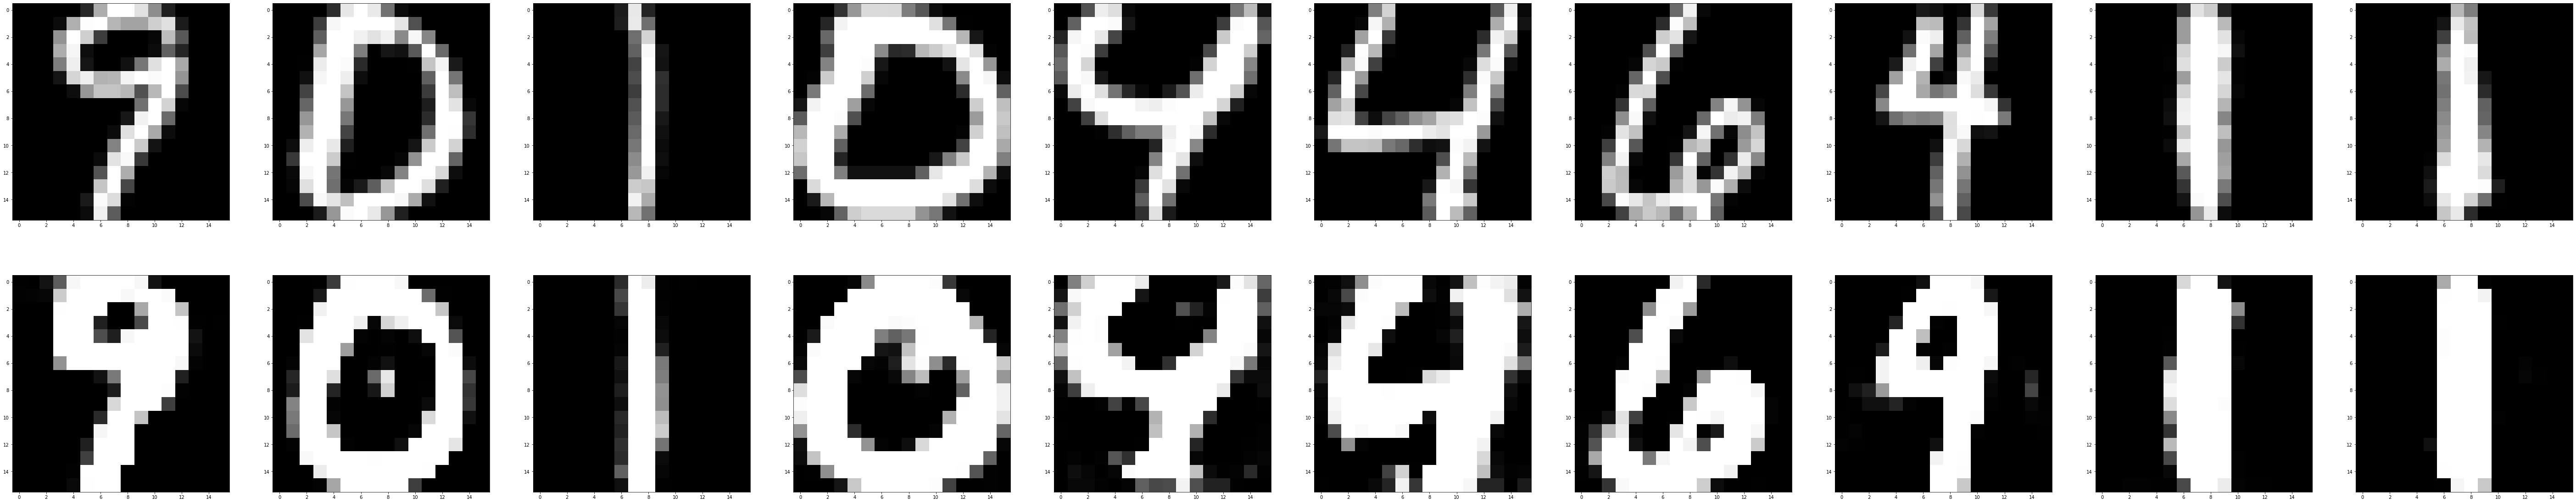

In [ ]:
nb_examples = 10
index = np.random.choice(np.arange(alltestx.shape[0]), nb_examples, replace=False)
plt.figure(figsize=(10*nb_examples,20))
j = 1
for i in index:
    plt.subplot(2,10,j)
    ut.show_usps(alltestx[i])

    plt.subplot(2,10,j+10)
    ut.show_usps(optimiser._net.forward(np.asarray([alltestx[i]])))
    
    j+=1

## Bruitage des images

#### Bruitage des données

In [31]:
noise = 0.1

X_train_noise_1 = ut.add_noise(X_train,noise_factor=noise)
X_test_noise_1 = ut.add_noise(X_test,noise_factor=noise)

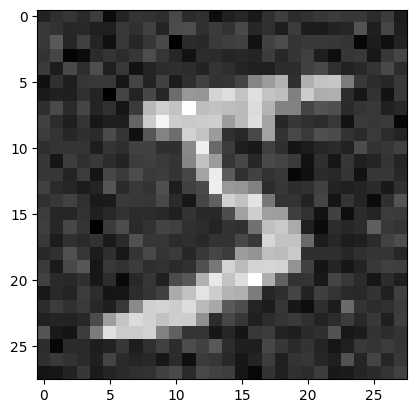

In [32]:
ut.show_usps_mnist(X_test_noise_1[0])

In [43]:
noise = 0.3

X_train_noise_2 = ut.add_noise(X_train,noise_factor=noise)
X_test_noise_2 = ut.add_noise(X_test,noise_factor=noise)

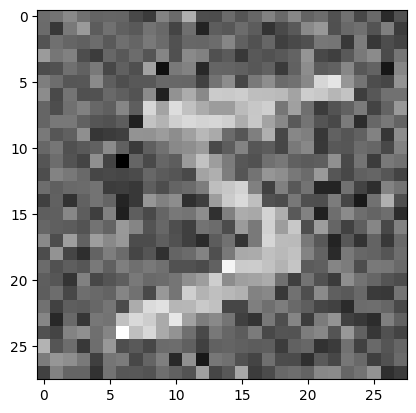

In [44]:
ut.show_usps_mnist(X_test_noise_2[0])

In [48]:
noise = 0.5

X_train_noise_3 = ut.add_noise(X_train,noise_factor=noise)
X_test_noise_3 = ut.add_noise(X_test,noise_factor=noise)

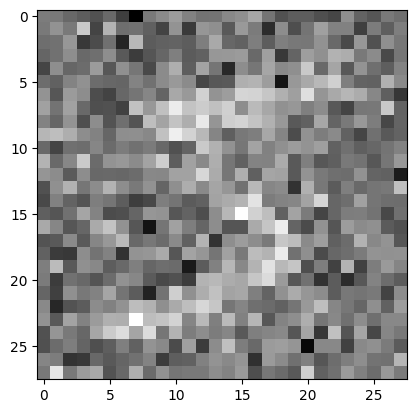

In [49]:
ut.show_usps_mnist(X_test_noise_3[0])

In [50]:
noise = 0.8

X_train_noise_4 = ut.add_noise(X_train,noise_factor=noise)
X_test_noise_4 = ut.add_noise(X_test,noise_factor=noise)

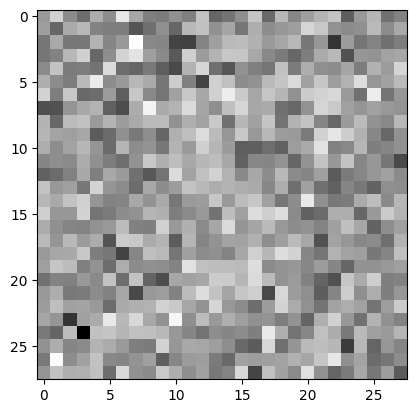

In [51]:
ut.show_usps_mnist(X_test_noise_4[0])

## Visualisation de le prediction des données Test bruitées avec un encodeur entrainé sur les données non bruité

#### nois = 0.1

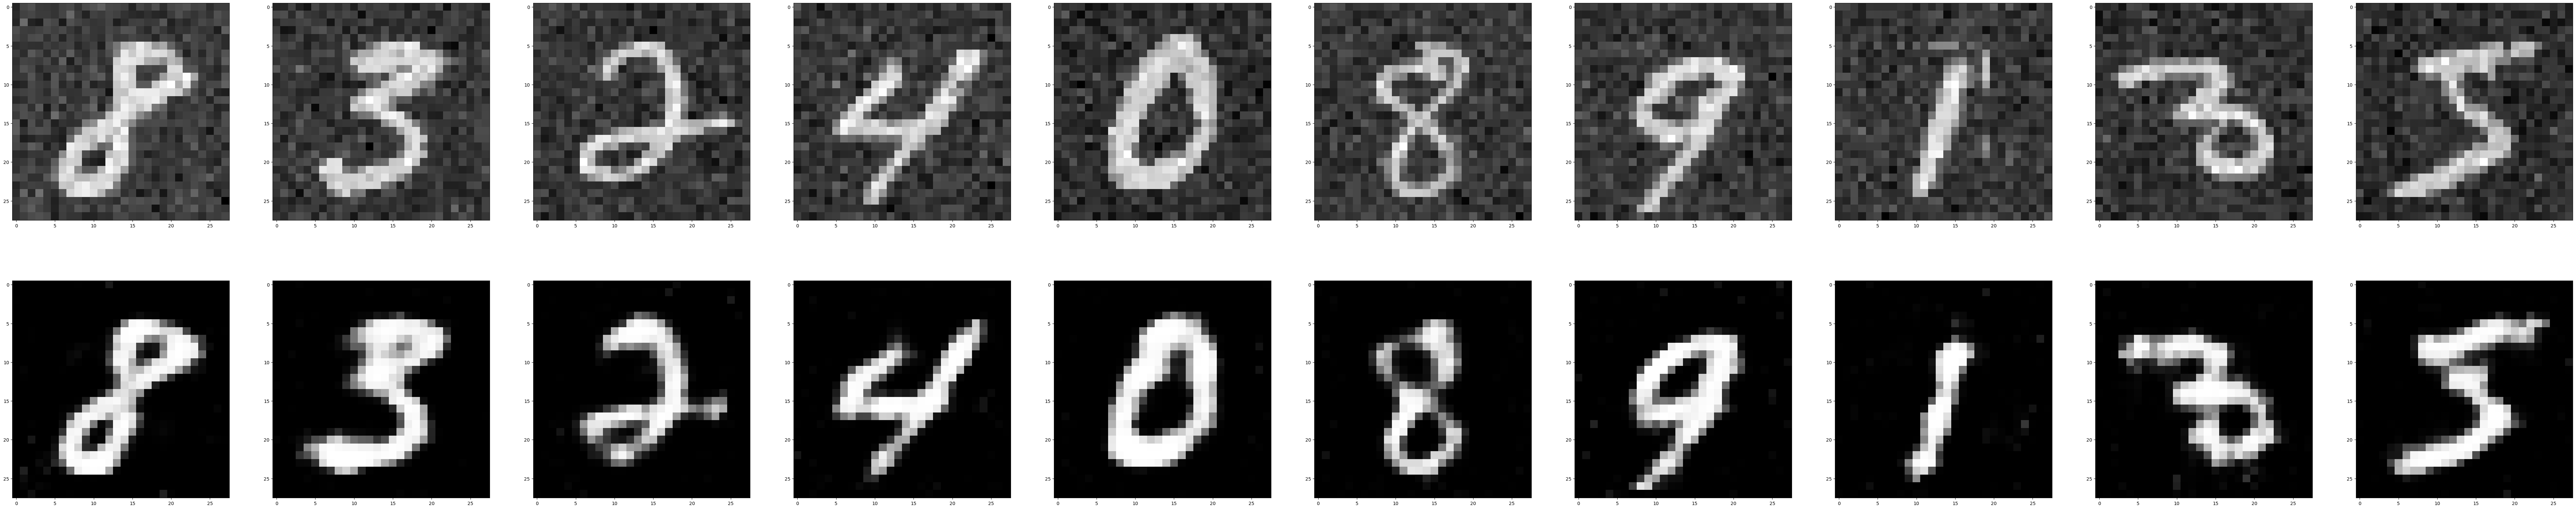

In [ ]:
plt.figure(figsize=(10*nb_examples,20))
j = 1
for i in index:
    plt.subplot(2,10,j)
    ut.show_usps_mnist(X_test_noise_1[i])

    plt.subplot(2,10,j+10)
    ut.show_usps_mnist(optimiser._net.forward(np.asarray([X_test_noise_1[i]])))
    
    j+=1

#### nois = 0.3

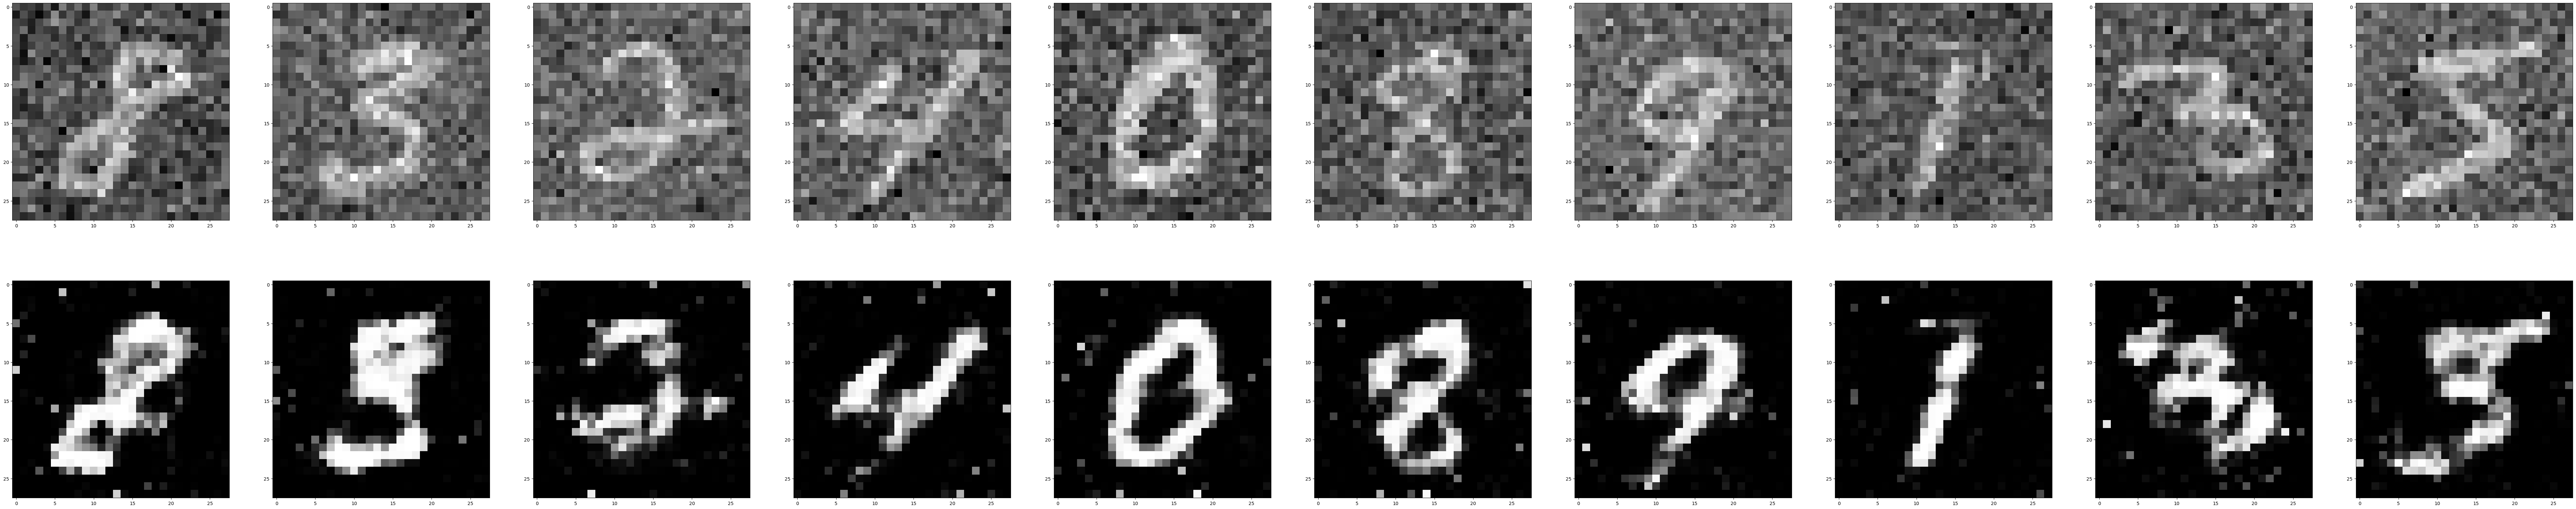

In [ ]:
plt.figure(figsize=(10*nb_examples,20))
j = 1
for i in index:
    plt.subplot(2,10,j)
    ut.show_usps_mnist(X_test_noise_2[i])

    plt.subplot(2,10,j+10)
    ut.show_usps_mnist(optimiser._net.forward(np.asarray([X_test_noise_2[i]])))
    
    j+=1

#### nois = 0.5

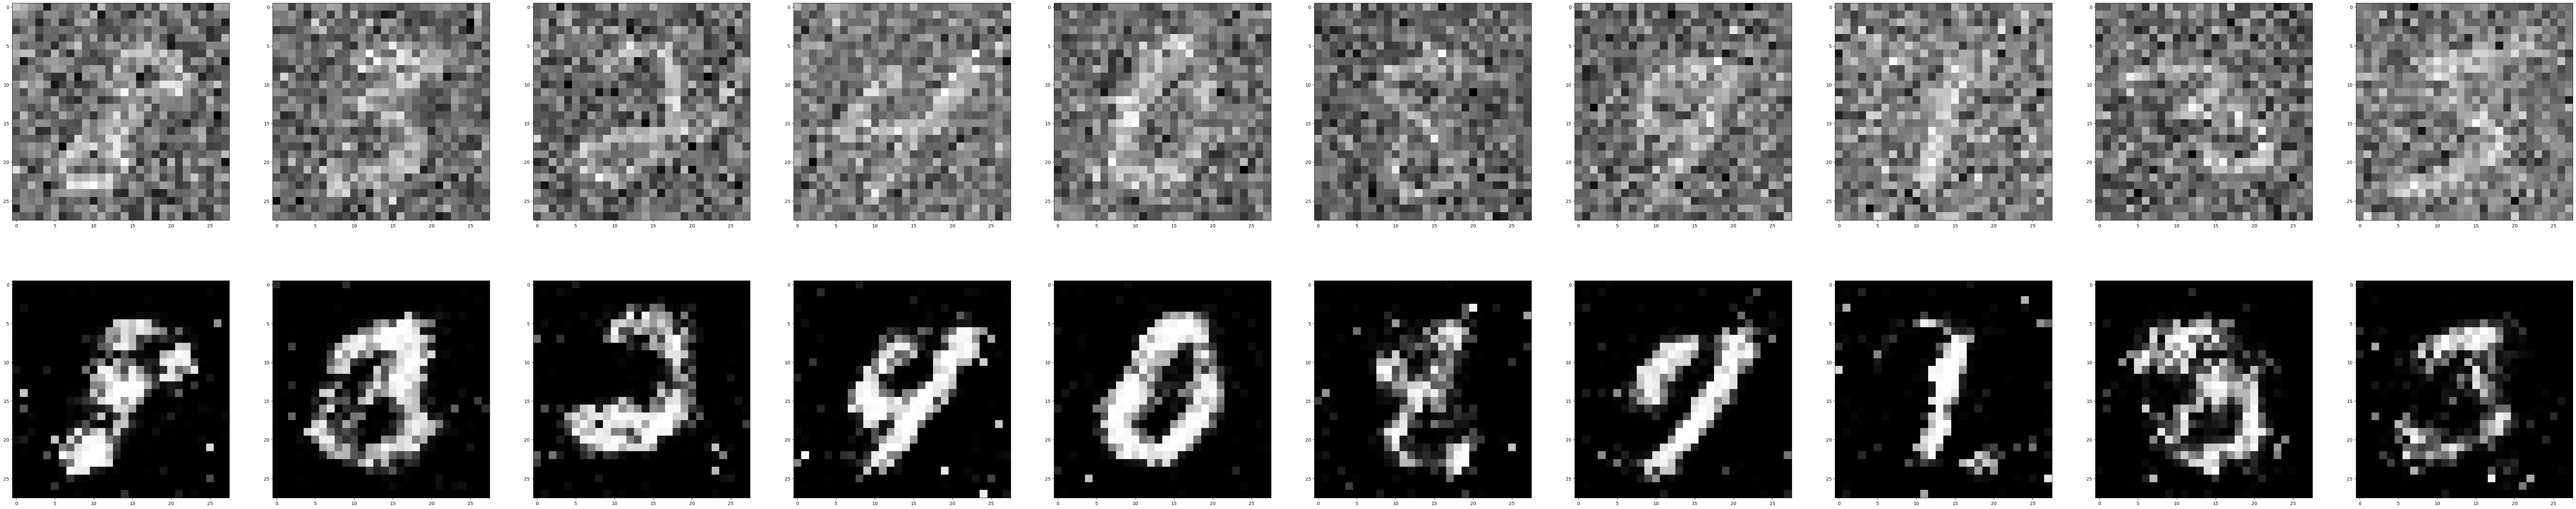

In [ ]:
plt.figure(figsize=(10*nb_examples,20))
j = 1
for i in index:
    plt.subplot(2,10,j)
    ut.show_usps_mnist(X_test_noise_3[i])

    plt.subplot(2,10,j+10)
    ut.show_usps_mnist(optimiser._net.forward(np.asarray([X_test_noise_3[i]])))
    
    j+=1

#### nois = 0.8

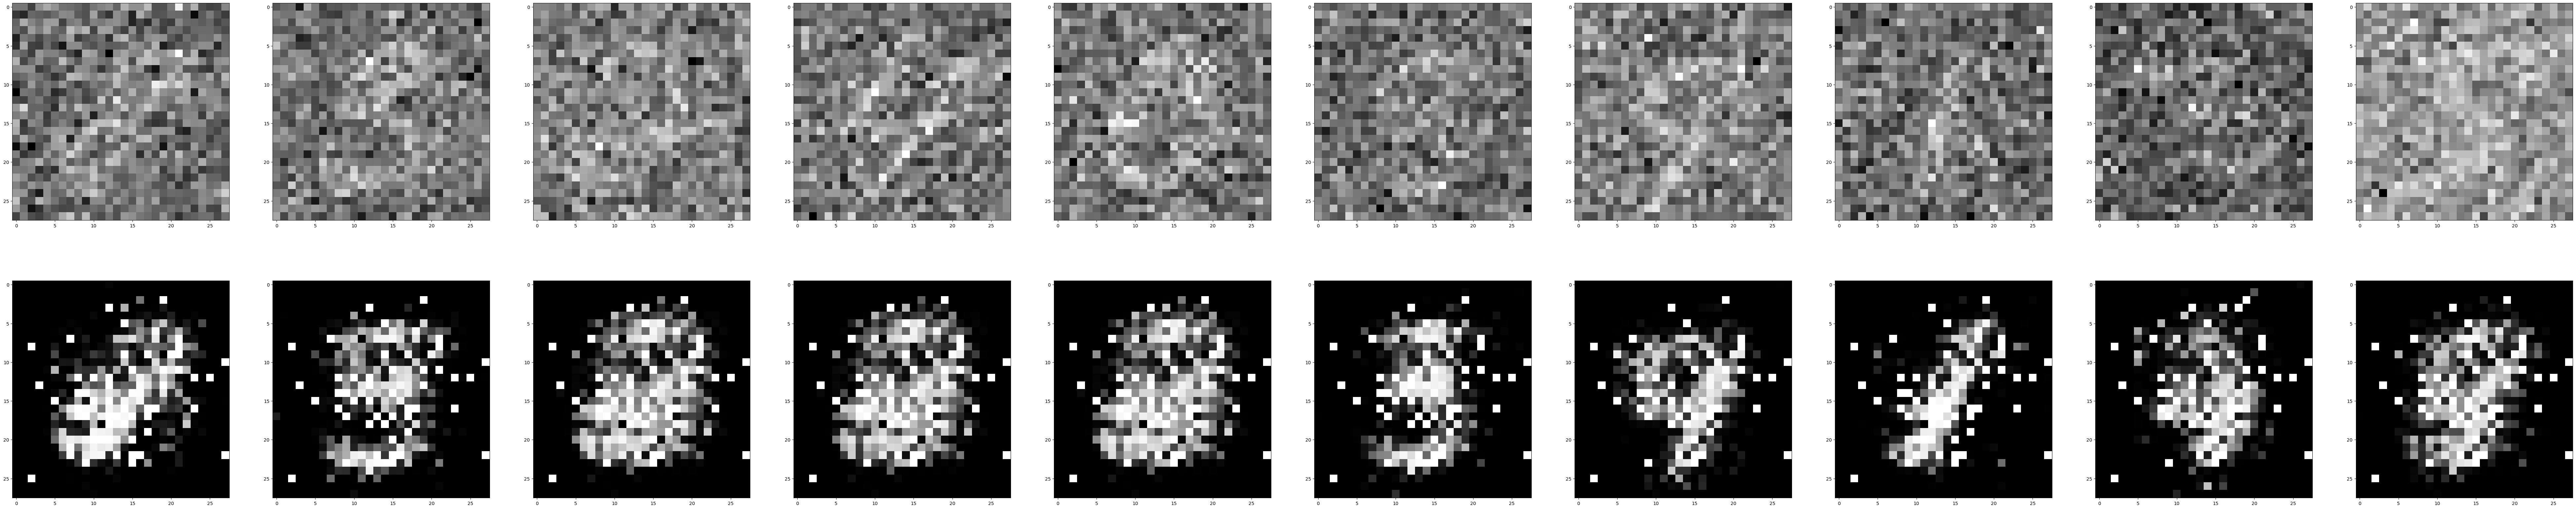

In [ ]:
plt.figure(figsize=(10*nb_examples,20))
j = 1
for i in index:
    plt.subplot(2,10,j)
    ut.show_usps_mnist(X_test_noise_4[i])

    plt.subplot(2,10,j+10)
    ut.show_usps_mnist(optimiser._net.forward(np.asarray([X_test_noise_4[i]])))
    
    j+=1

## Apprentissage avec des donnéess bruitées

### Création du modéle auto_encodeur 2

In [55]:
input_size = X_train.shape[1]
hidden_1 = input_size//2
output_size = hidden_1//2



module_1 = Module_lineare(input_size, hidden_1 , True)
module_2 = Module_lineare(hidden_1, output_size,True)

module_3 = Module_lineare(output_size, hidden_1,True)
module_3._parameters['weights'] = module_2._parameters['weights'].T
module_4 = Module_lineare(hidden_1, input_size,True)
module_4._parameters['weights'] = module_1._parameters['weights'].T

tan_1 = TanH()
tan_2 = TanH()

tan_3 = TanH()
sigmoide = Sigmoide()

loss = BCELoss()


Encodeur = [module_1,tan_1,module_2,tan_2]
Decodeur = [module_3,tan_3,module_4,sigmoide]

auto_encodeur = Encodeur + Decodeur
network_2 = Sequentiel(auto_encodeur)


optimiser_2 = Optim(network,loss,eps=1e-3)

In [57]:
batch_size = 20
epochs = 100

optimiser_2.SGD(X_train_noise_1, X_train_noise_1, batch_size, epochs)

epoch  0
epoch  1
epoch  2
epoch  3
epoch  4
epoch  5
epoch  6
epoch  7
epoch  8
epoch  9
epoch  10
epoch  11
epoch  12
epoch  13
epoch  14
epoch  15
epoch  16
epoch  17
epoch  18
epoch  19
epoch  20
epoch  21
epoch  22
epoch  23
epoch  24
epoch  25
epoch  26
epoch  27
epoch  28
epoch  29
epoch  30
epoch  31
epoch  32
epoch  33
epoch  34
epoch  35
epoch  36
epoch  37
epoch  38
epoch  39
epoch  40
epoch  41
epoch  42
epoch  43
epoch  44
epoch  45
epoch  46
epoch  47
epoch  48
epoch  49
epoch  50
epoch  51
epoch  52
epoch  53
epoch  54
epoch  55
epoch  56
epoch  57
epoch  58
epoch  59
epoch  60
epoch  61
epoch  62
epoch  63
epoch  64
epoch  65
epoch  66
epoch  67
epoch  68
epoch  69
epoch  70
epoch  71
epoch  72
epoch  73
epoch  74
epoch  75
epoch  76
epoch  77
epoch  78
epoch  79
epoch  80
epoch  81
epoch  82
epoch  83
epoch  84
epoch  85
epoch  86
epoch  87
epoch  88
epoch  89
epoch  90
epoch  91
epoch  92
epoch  93
epoch  94
epoch  95
epoch  96
epoch  97
epoch  98
epoch  99


[101.21228992198036,
 100.634894097381,
 98.60924120373053,
 97.06365087865603,
 95.95982082553968,
 95.0584285881821,
 94.14698389612633,
 93.04048293542334,
 92.04688414442518,
 91.08844368362763,
 90.28850519940127,
 89.38491385461012,
 88.70845492663551,
 87.86098347267576,
 87.17440474531948,
 86.71245888339769,
 86.19627841420012,
 85.56669329022971,
 85.12649854806453,
 84.46503213251835,
 84.14852700272768,
 83.32561752078892,
 82.80193322209362,
 82.33385475977778,
 81.95126043785552,
 80.48700214888368,
 72.56273427186727,
 71.73153440715916,
 71.32489248167467,
 71.17169298871262,
 70.85769251699696,
 70.43797387440418,
 70.14884404619478,
 69.98301196973,
 69.67769103418226,
 69.37409146437203,
 69.02683866270793,
 68.7983018783812,
 68.71629325976478,
 68.53604049074352,
 68.24344927770943,
 67.99749800807544,
 67.96853274568984,
 67.66432712025812,
 67.46974212996413,
 67.02187848648664,
 66.8734907333027,
 66.67369268061337,
 66.66386852040195,
 66.66351110868482,
 66.48

## Visualisation de le prediction des données Test bruitées

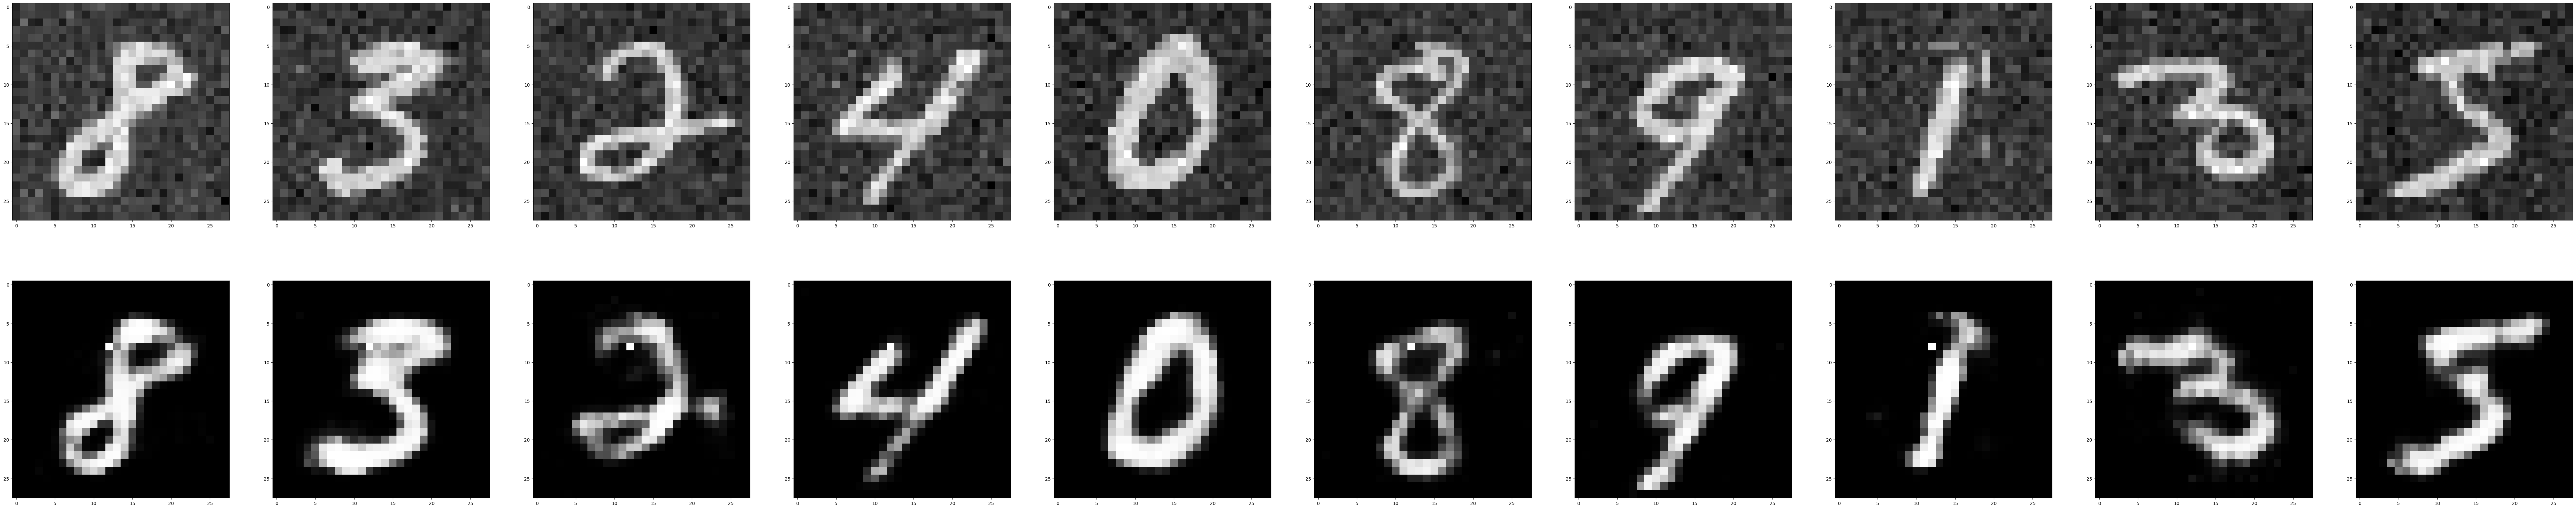

In [ ]:
# nb_examples = 10
# index = np.random.choice(np.arange(X_test.shape[0]), nb_examples, replace=False)
plt.figure(figsize=(10*nb_examples,20))
j = 1
for i in index:
    plt.subplot(2,10,j)
    ut.show_usps_mnist(X_test_noise_1[i])

    plt.subplot(2,10,j+10)
    ut.show_usps_mnist(optimiser_2._net.forward(np.asarray([X_test_noise_1[i]])))
    
    j+=1

### Création du modéle auto_encodeur 3

In [60]:
input_size = X_train.shape[1]
hidden_1 = input_size//2
output_size = hidden_1//2



module_1 = Module_lineare(input_size, hidden_1 , True)
module_2 = Module_lineare(hidden_1, output_size,True)

module_3 = Module_lineare(output_size, hidden_1,True)
module_3._parameters['weights'] = module_2._parameters['weights'].T
module_4 = Module_lineare(hidden_1, input_size,True)
module_4._parameters['weights'] = module_1._parameters['weights'].T

tan_1 = TanH()
tan_2 = TanH()

tan_3 = TanH()
sigmoide = Sigmoide()

loss = BCELoss()


Encodeur = [module_1,tan_1,module_2,tan_2]
Decodeur = [module_3,tan_3,module_4,sigmoide]

auto_encodeur = Encodeur + Decodeur
network_3 = Sequentiel(auto_encodeur)


optimiser_3 = Optim(network,loss,eps=1e-3)

In [61]:
batch_size = 20
epochs = 100

optimiser_3.SGD(X_train_noise_2, X_train_noise_2, batch_size, epochs)

epoch  0


epoch  1
epoch  2
epoch  3
epoch  4
epoch  5
epoch  6
epoch  7
epoch  8
epoch  9
epoch  10
epoch  11
epoch  12
epoch  13
epoch  14
epoch  15
epoch  16
epoch  17
epoch  18
epoch  19
epoch  20
epoch  21
epoch  22
epoch  23
epoch  24
epoch  25
epoch  26
epoch  27
epoch  28
epoch  29
epoch  30
epoch  31
epoch  32
epoch  33
epoch  34
epoch  35
epoch  36
epoch  37
epoch  38
epoch  39
epoch  40
epoch  41
epoch  42
epoch  43
epoch  44
epoch  45
epoch  46
epoch  47
epoch  48
epoch  49
epoch  50
epoch  51
epoch  52
epoch  53
epoch  54
epoch  55
epoch  56
epoch  57
epoch  58
epoch  59
epoch  60
epoch  61
epoch  62
epoch  63
epoch  64
epoch  65
epoch  66
epoch  67
epoch  68
epoch  69
epoch  70
epoch  71
epoch  72
epoch  73
epoch  74
epoch  75
epoch  76
epoch  77
epoch  78
epoch  79
epoch  80
epoch  81
epoch  82
epoch  83
epoch  84
epoch  85
epoch  86
epoch  87
epoch  88
epoch  89
epoch  90
epoch  91
epoch  92
epoch  93
epoch  94
epoch  95
epoch  96
epoch  97
epoch  98
epoch  99


[91.88514389212759,
 83.75484764652445,
 77.12561630088965,
 72.18624049340885,
 67.38997313475988,
 64.2855889789608,
 60.58008743610086,
 57.37214411634466,
 54.22243297765073,
 51.47429012058982,
 50.136136126912184,
 46.247700235842494,
 45.59508213333323,
 42.94132383496764,
 41.06231233834724,
 38.802096923869,
 37.89697757825986,
 36.43579746078104,
 35.13025008949069,
 34.79180105041743,
 33.28503289447273,
 32.265337665634064,
 29.775564464975446,
 30.040887666572395,
 29.83820101914537,
 28.654406947595376,
 28.95516650002438,
 25.72776161353931,
 26.238466927117035,
 24.845033932586034,
 25.182846409997996,
 27.349859652761,
 26.37007133120986,
 27.057315921686843,
 26.876525788017652,
 27.538080798283758,
 27.862264400777505,
 30.89819421752123,
 27.91203612798912,
 28.682412472386275,
 28.745911654206953,
 30.03812318436154,
 32.86693515007569,
 31.902318656742178,
 33.09128004005933,
 35.6727885100945,
 36.54379683450586,
 39.34304968634028,
 38.76853986660054,
 40.662585

## Visualisation de le prediction des données Test bruitées

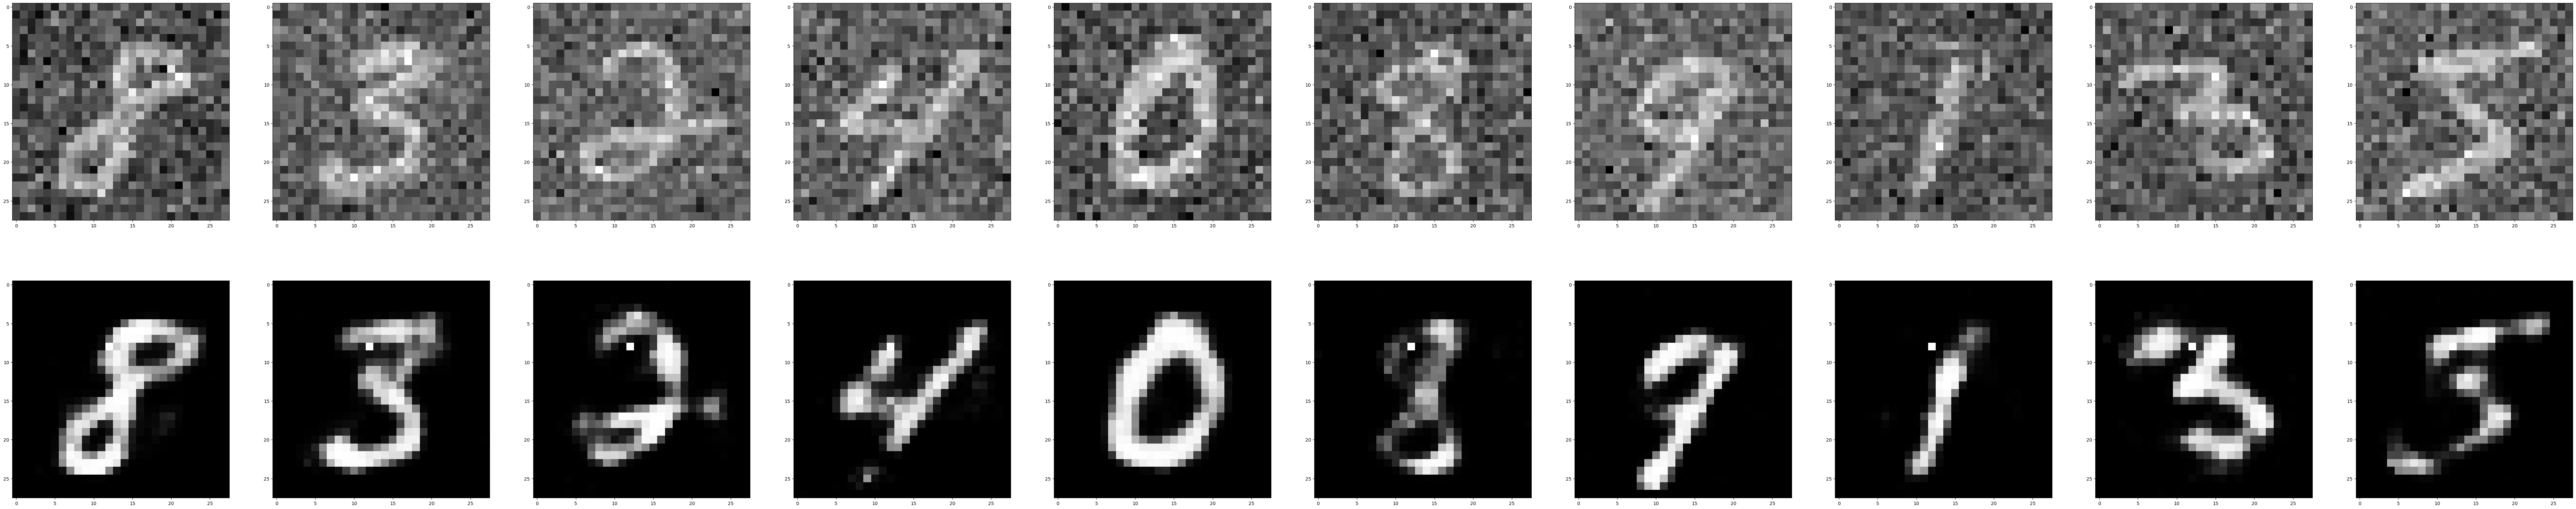

In [ ]:
plt.figure(figsize=(10*nb_examples,20))
j = 1
for i in index:
    plt.subplot(2,10,j)
    ut.show_usps_mnist(X_test_noise_2[i])

    plt.subplot(2,10,j+10)
    ut.show_usps_mnist(optimiser_3._net.forward(np.asarray([X_test_noise_2[i]])))
    
    j+=1

### Création du modéle auto_encodeur 4

In [63]:
input_size = X_train.shape[1]
hidden_1 = input_size//2
output_size = hidden_1//2



module_1 = Module_lineare(input_size, hidden_1 , True)
module_2 = Module_lineare(hidden_1, output_size,True)

module_3 = Module_lineare(output_size, hidden_1,True)
module_3._parameters['weights'] = module_2._parameters['weights'].T
module_4 = Module_lineare(hidden_1, input_size,True)
module_4._parameters['weights'] = module_1._parameters['weights'].T

tan_1 = TanH()
tan_2 = TanH()

tan_3 = TanH()
sigmoide = Sigmoide()

loss = BCELoss()


Encodeur = [module_1,tan_1,module_2,tan_2]
Decodeur = [module_3,tan_3,module_4,sigmoide]

auto_encodeur = Encodeur + Decodeur
network_4 = Sequentiel(auto_encodeur)


optimiser_4 = Optim(network,loss,eps=1e-3)

In [64]:
batch_size = 20
epochs = 100

optimiser_4.SGD(X_train_noise_3, X_train_noise_3, batch_size, epochs)

epoch  0


epoch  1
epoch  2
epoch  3
epoch  4
epoch  5
epoch  6
epoch  7
epoch  8
epoch  9
epoch  10
epoch  11
epoch  12
epoch  13
epoch  14
epoch  15
epoch  16
epoch  17
epoch  18
epoch  19
epoch  20
epoch  21
epoch  22
epoch  23
epoch  24
epoch  25
epoch  26
epoch  27
epoch  28
epoch  29
epoch  30
epoch  31
epoch  32
epoch  33
epoch  34
epoch  35
epoch  36
epoch  37
epoch  38
epoch  39
epoch  40
epoch  41
epoch  42
epoch  43
epoch  44
epoch  45
epoch  46
epoch  47
epoch  48
epoch  49
epoch  50
epoch  51
epoch  52
epoch  53
epoch  54
epoch  55
epoch  56
epoch  57
epoch  58
epoch  59
epoch  60
epoch  61
epoch  62
epoch  63
epoch  64
epoch  65
epoch  66
epoch  67
epoch  68
epoch  69
epoch  70
epoch  71
epoch  72
epoch  73
epoch  74
epoch  75
epoch  76
epoch  77
epoch  78
epoch  79
epoch  80
epoch  81
epoch  82
epoch  83
epoch  84
epoch  85
epoch  86
epoch  87
epoch  88
epoch  89
epoch  90
epoch  91
epoch  92
epoch  93
epoch  94
epoch  95
epoch  96
epoch  97
epoch  98
epoch  99


[108.31610405150084,
 112.42327136431243,
 114.81345386825534,
 130.2086710810038,
 132.73078316378724,
 141.6836280271828,
 136.37791236329264,
 133.44751145576075,
 141.69888802157206,
 138.49005600174004,
 139.27357907393406,
 136.08088981763015,
 143.74511187161133,
 139.00787680817297,
 135.93749186849723,
 137.07008399019756,
 132.76261027795968,
 134.1701691868286,
 140.06243533075974,
 140.8726381633192,
 138.86294094271665,
 136.1555227626391,
 134.30786359378112,
 138.0047768101843,
 137.42754511582763,
 141.2582306616411,
 147.37967365168117,
 141.03290704761852,
 135.26409308612924,
 136.23226650149368,
 135.6881970580559,
 134.0920129885073,
 131.87061730974733,
 137.60916224537573,
 139.68550615208096,
 139.37057126554487,
 138.8736514289574,
 142.82675820931186,
 138.8184526679247,
 136.41489763722987,
 133.3194808887742,
 136.56436670761272,
 137.4113179668167,
 135.0333576600663,
 132.3166824534813,
 135.4378101867637,
 138.18891799342435,
 136.0946034366999,
 136.7861

## Visualisation de le prediction des données Test bruitées

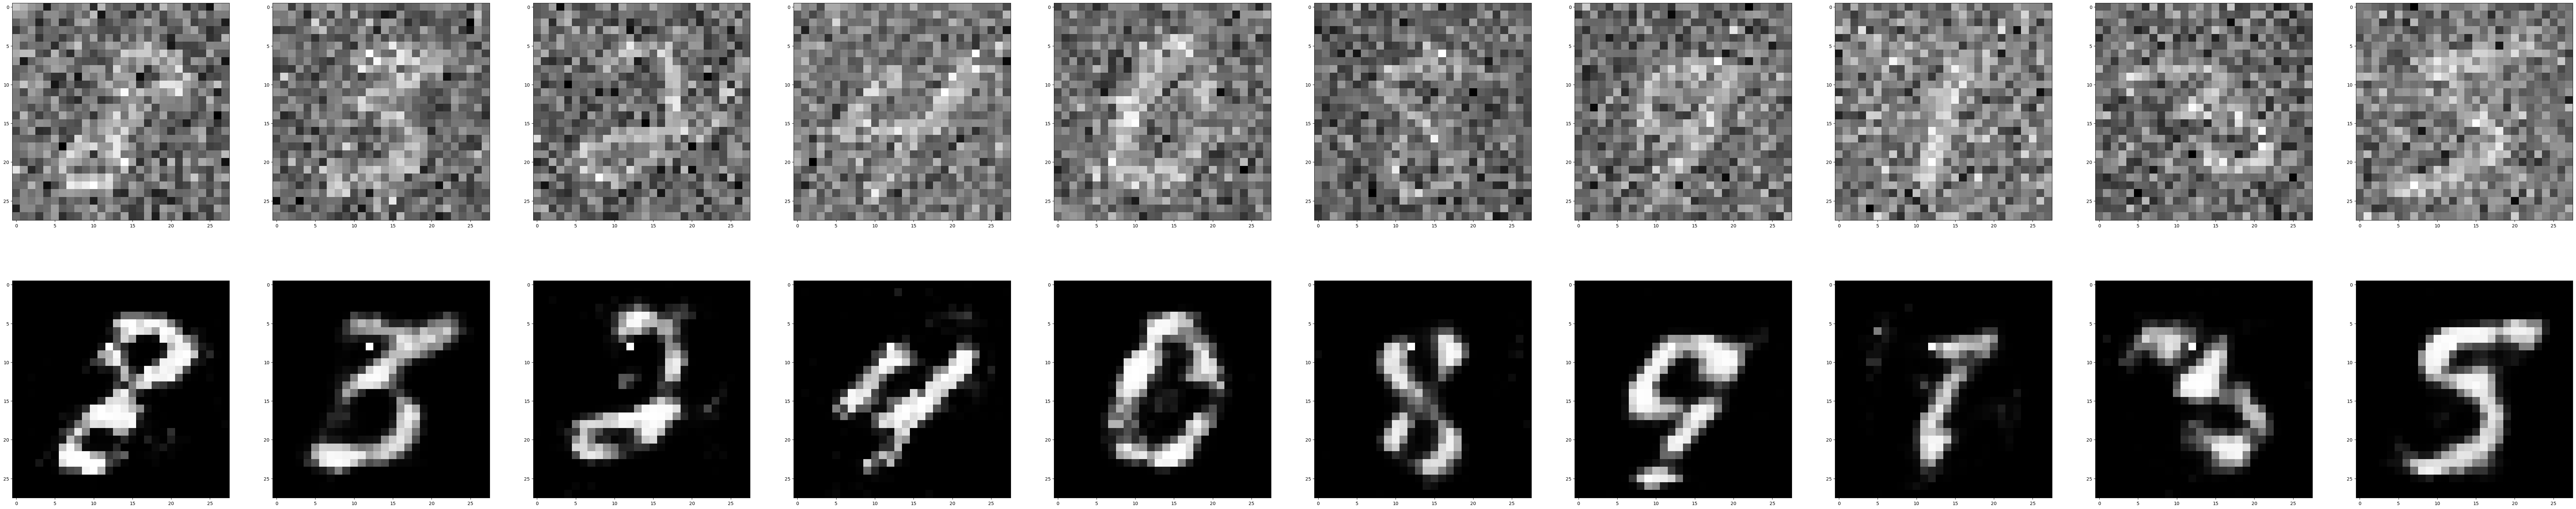

In [ ]:
plt.figure(figsize=(10*nb_examples,20))
j = 1
for i in index:
    plt.subplot(2,10,j)
    ut.show_usps_mnist(X_test_noise_3[i])

    plt.subplot(2,10,j+10)
    ut.show_usps_mnist(optimiser_4._net.forward(np.asarray([X_test_noise_3[i]])))
    
    j+=1

### Création du modéle auto_encodeur 5

In [66]:
input_size = X_train.shape[1]
hidden_1 = input_size//2
output_size = hidden_1//2



module_1 = Module_lineare(input_size, hidden_1 , True)
module_2 = Module_lineare(hidden_1, output_size,True)

module_3 = Module_lineare(output_size, hidden_1,True)
module_3._parameters['weights'] = module_2._parameters['weights'].T
module_4 = Module_lineare(hidden_1, input_size,True)
module_4._parameters['weights'] = module_1._parameters['weights'].T

tan_1 = TanH()
tan_2 = TanH()

tan_3 = TanH()
sigmoide = Sigmoide()

loss = BCELoss()


Encodeur = [module_1,tan_1,module_2,tan_2]
Decodeur = [module_3,tan_3,module_4,sigmoide]

auto_encodeur = Encodeur + Decodeur
network_5 = Sequentiel(auto_encodeur)


optimiser_5 = Optim(network,loss,eps=1e-3)

In [67]:
batch_size = 20
epochs = 100

optimiser_5.SGD(X_train_noise_4, X_train_noise_4, batch_size, epochs)

epoch  0
epoch  1
epoch  2
epoch  3
epoch  4
epoch  5
epoch  6
epoch  7
epoch  8
epoch  9
epoch  10
epoch  11
epoch  12
epoch  13
epoch  14
epoch  15
epoch  16
epoch  17
epoch  18
epoch  19
epoch  20
epoch  21
epoch  22
epoch  23
epoch  24
epoch  25
epoch  26
epoch  27
epoch  28
epoch  29
epoch  30
epoch  31
epoch  32
epoch  33
epoch  34
epoch  35
epoch  36
epoch  37
epoch  38
epoch  39
epoch  40
epoch  41
epoch  42
epoch  43
epoch  44
epoch  45
epoch  46
epoch  47
epoch  48
epoch  49
epoch  50
epoch  51
epoch  52
epoch  53
epoch  54
epoch  55
epoch  56
epoch  57
epoch  58
epoch  59
epoch  60
epoch  61
epoch  62
epoch  63
epoch  64
epoch  65
epoch  66
epoch  67
epoch  68
epoch  69
epoch  70
epoch  71
epoch  72
epoch  73
epoch  74
epoch  75
epoch  76
epoch  77
epoch  78
epoch  79
epoch  80
epoch  81
epoch  82
epoch  83
epoch  84
epoch  85
epoch  86
epoch  87
epoch  88
epoch  89
epoch  90
epoch  91
epoch  92
epoch  93
epoch  94
epoch  95
epoch  96
epoch  97
epoch  98
epoch  99


[2231.4462836189637,
 1964.3962850510468,
 1879.0070807013099,
 1827.0953481170231,
 1725.3086420392888,
 1704.5715974848717,
 1672.5261537212245,
 1637.2544900739667,
 1615.8069145626177,
 1600.474941349228,
 1567.3913775218266,
 1505.413829048488,
 1486.1678714957054,
 1445.5336683974895,
 1411.959074344546,
 1397.6759187367418,
 1388.3402645251015,
 1363.1354667807636,
 1341.5192247613895,
 1308.8367882524462,
 1305.2628822628585,
 1211.1147656111216,
 1163.6524768619,
 1161.9347188693862,
 1147.032921052159,
 1126.9743833088914,
 1118.8227151559493,
 1106.438099902145,
 1101.7767146561653,
 1098.6137577328686,
 1100.770954971688,
 1082.9417142126006,
 1085.826725545621,
 1067.3325887997546,
 1050.8816081124944,
 1040.1077789493047,
 1034.0949024165056,
 1029.878191687343,
 1026.9203721794693,
 1020.4440505079322,
 1009.5798479406351,
 1003.8513214493692,
 987.3873186706895,
 980.8809355716708,
 946.9026103368953,
 950.0757055864201,
 947.629709965569,
 945.5578752816624,
 944.74283

## Visualisation de le prediction des données Test bruitées

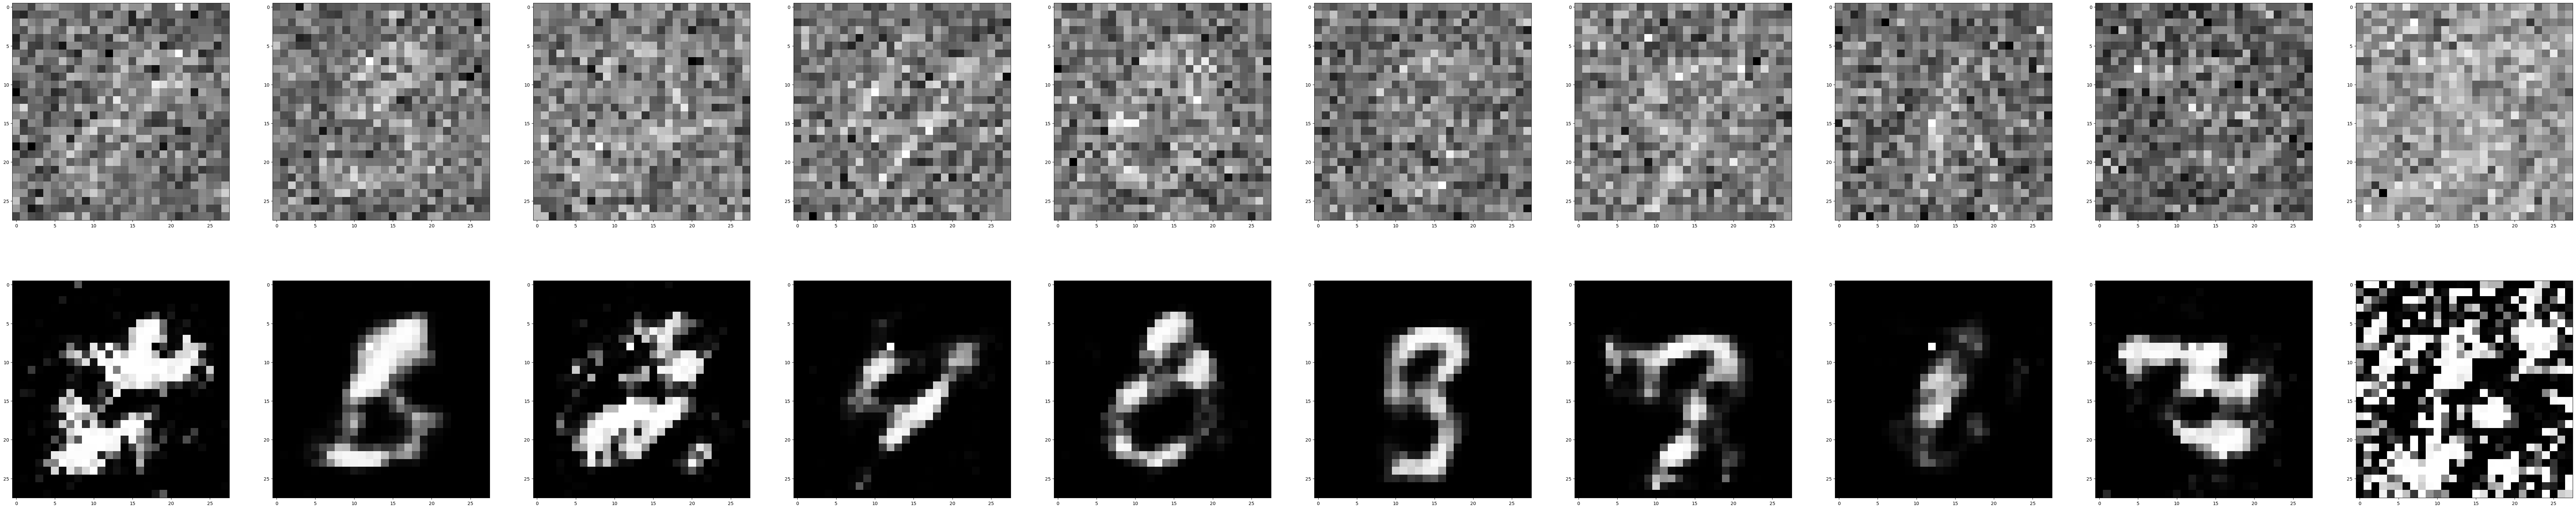

In [ ]:
plt.figure(figsize=(10*nb_examples,20))
j = 1
for i in index:
    plt.subplot(2,10,j)
    ut.show_usps_mnist(X_test_noise_4[i])

    plt.subplot(2,10,j+10)
    ut.show_usps_mnist(optimiser_5._net.forward(np.asarray([X_test_noise_4[i]])))
    
    j+=1

## Clustering


### Avec les images originales

In [141]:
nb_train = 10000
nb_test = 1000

X_train = all_X_train[:nb_train]
y_train = all_y_train[:nb_train]
X_test = all_X_test[:nb_test]
y_test = all_y_test[:nb_test]

In [135]:
tsne = TSNE(random_state=42, n_components=2, verbose=0, perplexity=50, n_iter=350)
X_tsne = tsne.fit_transform(X_train)

kmeans = KMeans(init="k-means++", n_clusters=10, n_init=4, random_state=0)
km = kmeans.fit(X_train)


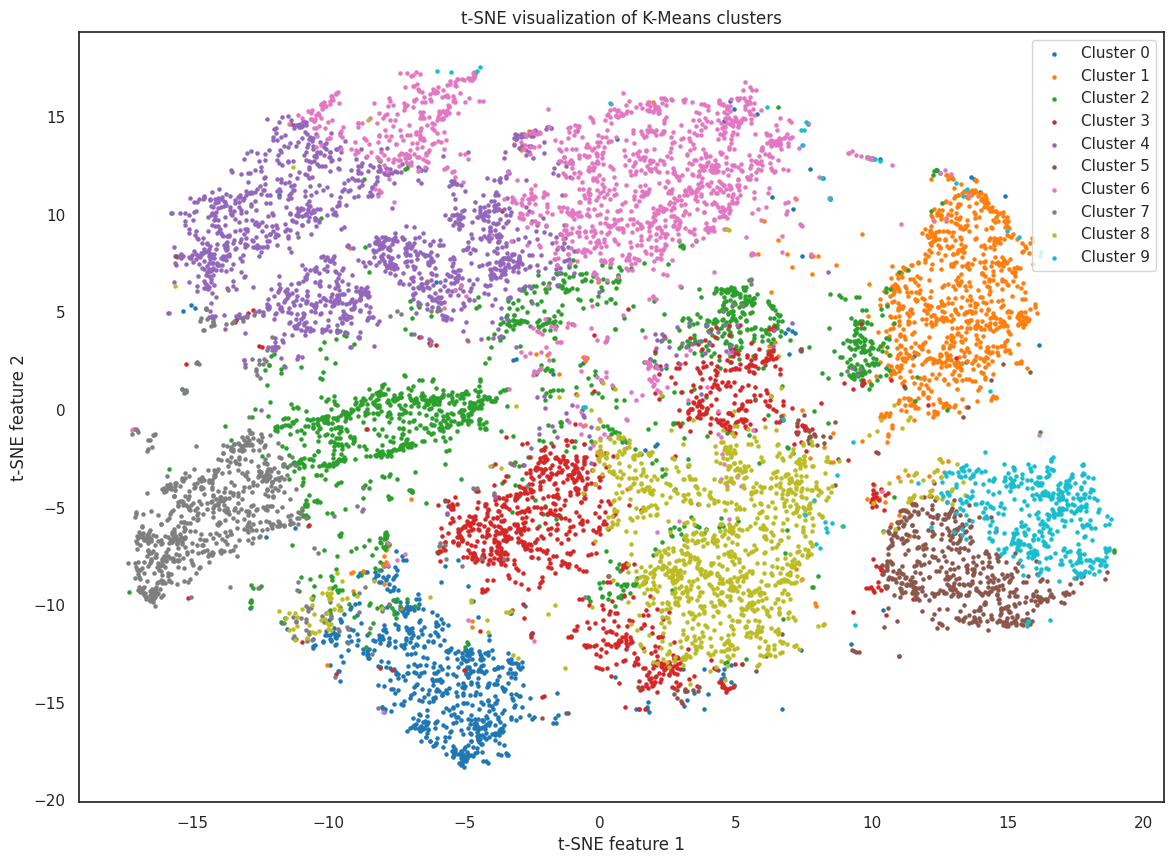

In [136]:
import seaborn as sns
labels = km.labels_

palette = plt.get_cmap('tab10')

# Visualiser les résultats t-SNE avec les étiquettes des clusters
%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
for i in range(10):  # Pour chaque cluster
    indices = labels == i
    plt.scatter(X_tsne[indices, 0], X_tsne[indices, 1], label=f'Cluster {i}', color=palette(i), s=5)

plt.legend()
plt.title("t-SNE visualization of K-Means clusters")
plt.xlabel("t-SNE feature 1")
plt.ylabel("t-SNE feature 2")
plt.show()

In [142]:
ut.prefomance_en_clustering(labels,y_train)

Adjusted Rand Index: 0.3411210396307356
Adjusted Mutual Information: 0.4907094467967914
Completeness Score: 0.498793843040231
Homogeneity Score: 0.48465189967305383
V-measure Score: 0.49162119082994216


### Avec les images reconstruites par l'auto-encodeur

In [144]:
input_size = X_train.shape[1]
hidden_1 = input_size//2
output_size = hidden_1//2



module_1 = Module_lineare(input_size, hidden_1 , True)
module_2 = Module_lineare(hidden_1, output_size,True)

module_3 = Module_lineare(output_size, hidden_1,True)
module_3._parameters['weights'] = module_2._parameters['weights'].T
module_4 = Module_lineare(hidden_1, input_size,True)
module_4._parameters['weights'] = module_1._parameters['weights'].T

tan_1 = TanH()
tan_2 = TanH()

tan_3 = TanH()
sigmoide = Sigmoide()

loss = BCELoss()


Encodeur = [module_1,tan_1,module_2,tan_2]
Decodeur = [module_3,tan_3,module_4,sigmoide]

auto_encodeur = Encodeur + Decodeur
network = Sequentiel(auto_encodeur)


optimiser = Optim(network,loss,eps=1e-3)

batch_size = 100
epochs = 100

optimiser.SGD(X_train, X_train, batch_size, epochs)

epoch  0
epoch  1
epoch  2
epoch  3
epoch  4
epoch  5
epoch  6
epoch  7
epoch  8
epoch  9
epoch  10
epoch  11
epoch  12
epoch  13
epoch  14
epoch  15
epoch  16
epoch  17
epoch  18
epoch  19
epoch  20
epoch  21
epoch  22
epoch  23
epoch  24
epoch  25
epoch  26
epoch  27
epoch  28
epoch  29
epoch  30
epoch  31
epoch  32
epoch  33
epoch  34
epoch  35
epoch  36
epoch  37
epoch  38
epoch  39
epoch  40
epoch  41
epoch  42
epoch  43
epoch  44
epoch  45
epoch  46
epoch  47
epoch  48
epoch  49
epoch  50
epoch  51
epoch  52
epoch  53
epoch  54
epoch  55
epoch  56
epoch  57
epoch  58
epoch  59
epoch  60
epoch  61
epoch  62
epoch  63
epoch  64
epoch  65
epoch  66
epoch  67
epoch  68
epoch  69
epoch  70
epoch  71
epoch  72
epoch  73
epoch  74
epoch  75
epoch  76
epoch  77
epoch  78
epoch  79
epoch  80
epoch  81
epoch  82
epoch  83
epoch  84
epoch  85
epoch  86
epoch  87
epoch  88
epoch  89
epoch  90
epoch  91
epoch  92
epoch  93
epoch  94
epoch  95
epoch  96
epoch  97
epoch  98
epoch  99


[24.855749541459048,
 4.916557012416203,
 4.862596676899523,
 4.832637853475827,
 4.810957513914441,
 4.791016180044954,
 4.7652007671944485,
 4.737212289393528,
 4.713789712267393,
 4.702355884148209,
 4.694854290460915,
 4.684446567138667,
 4.675489472996969,
 4.663318199155462,
 4.649398280862989,
 4.641751534495069,
 4.6364427122259375,
 4.629499688440379,
 4.624435048217585,
 4.621939001418098,
 4.619580450762671,
 4.61691200204599,
 4.6137506816972635,
 4.609673748959954,
 4.603061529011987,
 4.589874642188414,
 4.583493577741951,
 4.57962761821204,
 4.57424579376889,
 4.568234032936519,
 4.559600699607579,
 4.550338194893972,
 4.546734948143577,
 4.5451019669046016,
 4.543141232698916,
 4.540521291039665,
 4.536269087448047,
 4.529554328001669,
 4.5243694888385475,
 4.523297365990277,
 4.522250308851805,
 4.521137447270018,
 4.519908969869398,
 4.518463664402324,
 4.516537360280676,
 4.5134190603692295,
 4.510907237780997,
 4.509814098434202,
 4.508674673318657,
 4.5074201028670

In [145]:
X_train_pred = optimiser._net.forward(X_train)

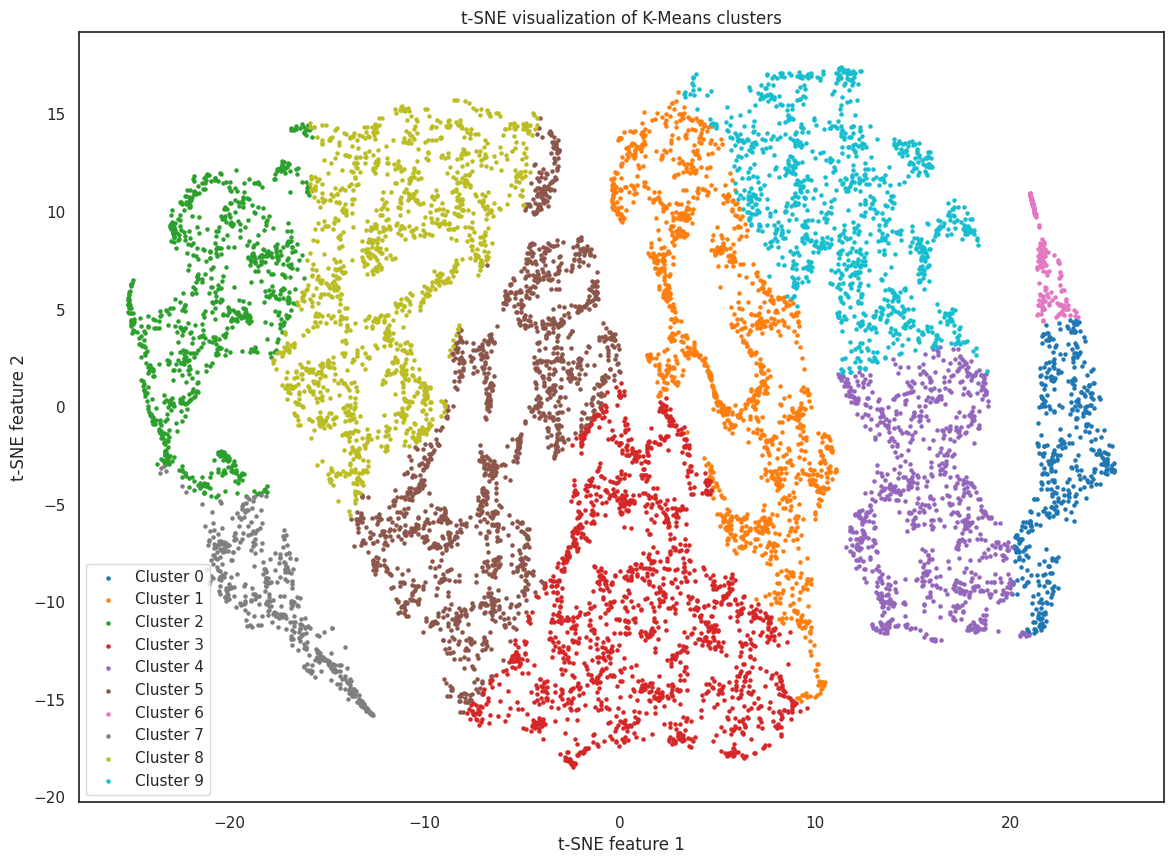

In [146]:
tsne = TSNE(random_state=42, n_components=2, verbose=0, perplexity=50, n_iter=350)
X_tsne = tsne.fit_transform(X_train_pred)

kmeans = KMeans(init="k-means++", n_clusters=10, n_init=4, random_state=0)
km = kmeans.fit(X_train_pred)

labels = km.labels_

palette = plt.get_cmap('tab10')

# Visualiser les résultats t-SNE avec les étiquettes des clusters
%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
for i in range(10):  # Pour chaque cluster
    indices = labels == i
    plt.scatter(X_tsne[indices, 0], X_tsne[indices, 1], label=f'Cluster {i}', color=palette(i), s=5)

plt.legend()
plt.title("t-SNE visualization of K-Means clusters")
plt.xlabel("t-SNE feature 1")
plt.ylabel("t-SNE feature 2")
plt.show()

In [149]:
ut.prefomance_en_clustering(labels,y_train)

Adjusted Rand Index: 0.019770401602604525
Adjusted Mutual Information: 0.051476186540096835
Completeness Score: 0.054834510074812534
Homogeneity Score: 0.05166317527875074
V-measure Score: 0.05320162397735488


### Avec la représentation latente de l'auto-encodeur

In [8]:
input_size = X_train.shape[1]
hidden_1 = input_size//2
output_size = hidden_1//2


module_1 = Module_lineare(input_size, hidden_1 , True)
module_2 = Module_lineare(hidden_1, output_size,True)

module_3 = Module_lineare(output_size, hidden_1,True)
module_3._parameters['weights'] = module_2._parameters['weights'].T
module_4 = Module_lineare(hidden_1, input_size,True)
module_4._parameters['weights'] = module_1._parameters['weights'].T

tan_1 = TanH()
tan_2 = TanH()

tan_3 = TanH()
sigmoide = Sigmoide()

loss = BCELoss()


Encodeur = [module_1,tan_1,module_2,tan_2]
Decodeur = [module_3,tan_3,module_4,sigmoide]

auto_encodeur = Encodeur + Decodeur
network = Sequentiel(auto_encodeur)


optimiser = Optim(network,loss,eps=1e-3)

batch_size = 100
epochs = 100

optimiser.SGD(X_train, X_train, batch_size, epochs)

epoch  0
epoch  1
epoch  2
epoch  3
epoch  4
epoch  5
epoch  6
epoch  7
epoch  8
epoch  9
epoch  10
epoch  11
epoch  12
epoch  13
epoch  14
epoch  15
epoch  16
epoch  17
epoch  18
epoch  19
epoch  20
epoch  21
epoch  22
epoch  23
epoch  24
epoch  25
epoch  26
epoch  27
epoch  28
epoch  29
epoch  30
epoch  31
epoch  32
epoch  33
epoch  34
epoch  35
epoch  36
epoch  37
epoch  38
epoch  39
epoch  40
epoch  41
epoch  42
epoch  43
epoch  44
epoch  45
epoch  46
epoch  47
epoch  48
epoch  49
epoch  50
epoch  51
epoch  52
epoch  53
epoch  54
epoch  55
epoch  56
epoch  57
epoch  58
epoch  59
epoch  60
epoch  61
epoch  62
epoch  63
epoch  64
epoch  65
epoch  66
epoch  67
epoch  68
epoch  69
epoch  70
epoch  71
epoch  72
epoch  73
epoch  74
epoch  75
epoch  76
epoch  77
epoch  78
epoch  79
epoch  80
epoch  81
epoch  82
epoch  83
epoch  84
epoch  85
epoch  86
epoch  87
epoch  88
epoch  89
epoch  90
epoch  91
epoch  92
epoch  93
epoch  94
epoch  95
epoch  96
epoch  97
epoch  98
epoch  99


[48.782555931313546,
 4.957560736799974,
 4.896831664939121,
 4.859833974112715,
 4.832906606571658,
 4.814225280165327,
 4.800873590124923,
 4.785978600285835,
 4.770281267478872,
 4.758593679767614,
 4.749877481611377,
 4.743585920629496,
 4.738909451627124,
 4.733761976264663,
 4.727093646862783,
 4.717566902710283,
 4.708199736325485,
 4.700936308537645,
 4.6956813530984425,
 4.690323097629439,
 4.686326424068382,
 4.6834115272254575,
 4.680040083594055,
 4.675692572073646,
 4.669798316487783,
 4.6637055819720175,
 4.660138106422523,
 4.658135474078205,
 4.656343813427393,
 4.654471852330343,
 4.652461662017131,
 4.650249152026111,
 4.647719475743511,
 4.644654738370413,
 4.6405934462045435,
 4.634789016100741,
 4.629525145539336,
 4.626478118913017,
 4.622894685209819,
 4.61941267278633,
 4.617064048926699,
 4.614624968449463,
 4.611642173467066,
 4.607665339024022,
 4.6019756833693375,
 4.596109053292613,
 4.593224555021078,
 4.591016257439126,
 4.588653593483898,
 4.585851610150

In [10]:
espace_latent = optimiser._net._modules[3].forward(X_train)

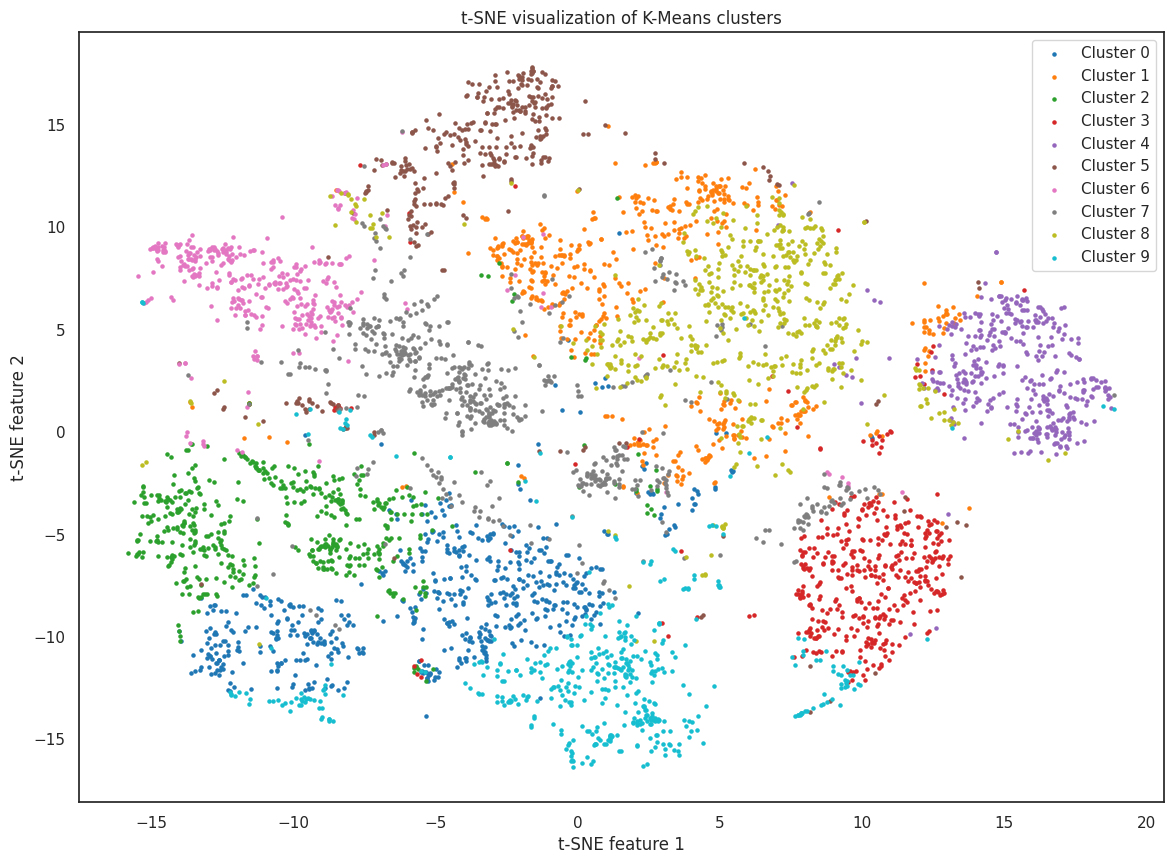

In [13]:
import seaborn as sns

tsne = TSNE(random_state=42, n_components=2, verbose=0, perplexity=50, n_iter=350)
X_tsne = tsne.fit_transform(espace_latent)

kmeans = KMeans(init="k-means++", n_clusters=10, n_init=4, random_state=0)
km = kmeans.fit(espace_latent)

labels = km.labels_

palette = plt.get_cmap('tab10')

# Visualiser les résultats t-SNE avec les étiquettes des clusters
%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
for i in range(10):  # Pour chaque cluster
    indices = labels == i
    plt.scatter(X_tsne[indices, 0], X_tsne[indices, 1], label=f'Cluster {i}', color=palette(i), s=5)

plt.legend()
plt.title("t-SNE visualization of K-Means clusters")
plt.xlabel("t-SNE feature 1")
plt.ylabel("t-SNE feature 2")
plt.show()